# 🌍 Çocuk İstihdamı Analizi - İlk 4 Adım (Birleşik)
## ASA Veri Yarışması 2025

---

Bu notebook aşağıdaki adımları içerir:
1. **Setup ve Veri Yükleme**
2. **Veri Ön İşleme** (Hedef değişken tanımlama + formül)
3. **Veri Kalitesi Analizi**
4. **Keşifsel Veri Analizi (EDA)** - Detaylı + Dünya Haritası

---

## 📦 1. SETUP ve VERİ YÜKLEME


In [84]:
# Kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# İstatistiksel modelleme
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro, kstest

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
%matplotlib inline

print("✅ Kütüphaneler yüklendi")


✅ Kütüphaneler yüklendi


In [85]:
# Veri setini yükle
df = pd.read_csv('asa_under14_dataset.csv')

In [86]:
print("="*80)
print("📊 VERİ SETİ YÜKLEME BAŞARILI")
print("="*80)
print(f"Boyut: {df.shape[0]} satır × {df.shape[1]} sütun")
print("indicators: ", df.columns)
print(f"Zaman aralığı: {df['year'].min()} - {df['year'].max()}")
print(f"Ülke sayısı: {df['country_code'].nunique()}")
print(f"Bölge sayısı: {df['region'].nunique()}")

# İlk satırları göster
print("\n📋 İlk 5 satır:")
df.head()

print("📊 ANA ANALİZ VERİ SETİ (2010-2025)")
print("="*80)
print(f"Toplam gözlem: {len(df):,}")
print(f"Benzersiz ülke: {df['country_code'].nunique()}")
print(f"Yıl aralığı: {df['year'].min()} - {df['year'].max()}")
print(f"Bölge sayısı: {df['region'].nunique()}")
print(f"Gelir grubu sayısı: {df['income_group'].nunique()}")

print("\n📋 Bölgelere göre dağılım:")
region_dist = df['region'].value_counts()
for region, count in region_dist.items():
    pct = (count / len(df)) * 100
    print(f"  {region[:45]:45s}: {count:3d} ({pct:5.1f}%)")


📊 VERİ SETİ YÜKLEME BAŞARILI
Boyut: 251 satır × 23 sütun
indicators:  Index(['country_code', 'country_name', 'year', 'region', 'income_group',
       'child_employment_thousands', 'ilo_source', 'rural_electricity_access',
       'mobile_subscriptions_per100', 'private_consumption_per_capita',
       'agriculture_value_added_pct', 'gdp_per_capita_ppp',
       'primary_school_enrollment', 'child_mortality_rate',
       'youth_unemployment_rate', 'life_expectancy', 'child_population_pct',
       'total_population', 'urban_population_pct', 'control_of_corruption',
       'government_effectiveness', 'rule_of_law', 'rate_age_basis'],
      dtype='object')
Zaman aralığı: 1996 - 2024
Ülke sayısı: 84
Bölge sayısı: 6

📋 İlk 5 satır:


,country_code,country_name,year,region,income_group,child_employment_thousands,ilo_source,rural_electricity_access,mobile_subscriptions_per100,private_consumption_per_capita,...,child_mortality_rate,youth_unemployment_rate,life_expectancy,child_population_pct,total_population,urban_population_pct,control_of_corruption,government_effectiveness,rule_of_law,rate_age_basis
0,AFG,Afghanistan,2014,"Middle East, North Africa, Afghanistan & Pakistan",Low income,2306.470,Repository: ILO-STATISTICS - Micro data proces...,86.5,56.1322,NaN,...,75.1,10.094,62.260,46.713066,32792523.0,24.587,-1.364934,-1.361646,-1.437702,5-14
1,AFG,Afghanistan,2023,"Middle East, North Africa, Afghanistan & Pakistan",Low income,3014.453,Repository: ILO-STATISTICS - Micro data proces...,81.4,55.5475,NaN,...,55.5,17.291,66.035,43.226204,41454761.0,26.933,-1.154932,-1.987014,-1.649641,5-14
2,ARG,Argentina,2017,Latin America & Caribbean,Upper middle income,6.125,Repository: ILO-STATISTICS - Micro data proces...,100.0,139.7580,9146.511758,...,11.0,22.843,76.543,24.579132,44288894.0,91.749,-0.309002,0.135086,-0.237312,5-14
3,ARG,Argentina,2018,Latin America & Caribbean,Upper middle income,5.834,Repository: ILO-STATISTICS - Micro data proces...,99.9,131.2240,8867.825537,...,10.7,23.845,76.770,24.373292,44654882.0,91.870,-0.099274,0.028061,-0.219330,5-14
4,ARG,Argentina,2019,Latin America & Caribbean,Upper middle income,6.553,Repository: ILO-STATISTICS - Micro data proces...,100.0,125.3030,8265.532686,...,10.5,25.842,76.847,24.097291,44973465.0,91.991,-0.107116,-0.120795,-0.427360,5-14


📊 ANA ANALİZ VERİ SETİ (2010-2025)
Toplam gözlem: 251
Benzersiz ülke: 84
Yıl aralığı: 1996 - 2024
Bölge sayısı: 6
Gelir grubu sayısı: 4

📋 Bölgelere göre dağılım:
  Latin America & Caribbean                    : 103 ( 41.0%)
  Sub-Saharan Africa                           :  71 ( 28.3%)
  Middle East, North Africa, Afghanistan & Paki:  34 ( 13.5%)
  East Asia & Pacific                          :  24 (  9.6%)
  Europe & Central Asia                        :  10 (  4.0%)
  South Asia                                   :   7 (  2.8%)


## 2. **Veri Ön İşleme** (Hedef değişken tanımlama + formül)


In [87]:
child_population = (df['child_population_pct'] / 100) * df['total_population']

df['child_employment_rate'] = (df['child_employment_thousands'] * 1000 / child_population) * 100
df['child_employment_rate']

0      15.056867
1      16.822363
2       0.056266
3       0.053602
4       0.060467
         ...    
246     5.641512
247     4.425909
248     4.755610
249     3.137753
250    26.691003
Name: child_employment_rate, Length: 251, dtype: float64

## 🔍 3. VERİ KALİTESİ ANALİZİ


In [88]:
# Yıllara göre veri kapsamı
print("="*80)
print("📅 TABLO 2: Yıl Bazında Örneklem Kapsamı")
print("="*80)

year_coverage = df.groupby('year').agg({
    'country_code': 'count',
    'child_employment_thousands': lambda x: x.notna().sum(),
    'gdp_per_capita_ppp': lambda x: x.notna().sum(),
    'primary_school_enrollment': lambda x: x.notna().sum()
}).rename(columns={
    'country_code': 'N_total',
    'child_employment_thousands': 'N_child_emp',
    'gdp_per_capita_ppp': 'N_gdp',
    'primary_school_enrollment': 'N_education'
})

print(year_coverage)



📅 TABLO 2: Yıl Bazında Örneklem Kapsamı
      N_total  N_child_emp  N_gdp  N_education
year                                          
1996        1            1      1            0
2001        1            1      1            1
2007        2            2      2            2
2008        3            3      3            3
2009        3            3      3            3
2010        9            9      9            9
2011        6            6      6            4
2012       12           12     12            9
2013        8            8      8            8
2014       20           20     20           19
2015       13           13     13           13
2016       13           13     13           12
2017       16           16     15           15
2018       20           20     20           19
2019       28           28     28           24
2020       17           17     17           16
2021       20           20     20           16
2022       36           36     36           27
2023       16       

Text(0.5, 0, 'Yıl')

Text(0, 0.5, 'Total Observations')

Text(0.5, 1.0, 'Figure 1A: Yearly Data Availability Overview')

"\n# Sağ: Değişkenlere göre eksik veri oranı\nkey_vars = [\n    'child_employment_thousands',\n    'gdp_per_capita_ppp',\n    'primary_school_enrollment',\n    'urban_population_pct',\n    'agriculture_value_added_pct',\n    'life_expectancy',\n    'rural_electricity_access',\n    'control_of_corruption'\n]\n"

[Text(0, 0, 'Country Code'),
 Text(0, 1, 'Country Name'),
 Text(0, 2, 'Year'),
 Text(0, 3, 'Child Employment Thousands'),
 Text(0, 4, 'Child Employment Rate'),
 Text(0, 5, 'Urban Population Pct'),
 Text(0, 6, 'Total Population'),
 Text(0, 7, 'Child Population Pct'),
 Text(0, 8, 'Rate Age Basis'),
 Text(0, 9, 'Region'),
 Text(0, 10, 'Youth Unemployment Rate'),
 Text(0, 11, 'Ilo Source'),
 Text(0, 12, 'Gdp Per Capita Ppp'),
 Text(0, 13, 'Agriculture Value Added Pct'),
 Text(0, 14, 'Income Group'),
 Text(0, 15, 'Life Expectancy'),
 Text(0, 16, 'Child Mortality Rate'),
 Text(0, 17, 'Mobile Subscriptions Per100'),
 Text(0, 18, 'Rule Of Law'),
 Text(0, 19, 'Control Of Corruption'),
 Text(0, 20, 'Government Effectiveness'),
 Text(0, 21, 'Rural Electricity Access'),
 Text(0, 22, 'Private Consumption Per Capita'),
 Text(0, 23, 'Primary School Enrollment')]

Text(0.5, 0, 'Proportion of Missing Data (%)')

Text(0.5, 1.0, 'Figure 1B: Variable-Wise Missing Data Overview')

Text(0.5, 0, '0.0%')

Text(0.5, 1, '0.0%')

Text(0.5, 2, '0.0%')

Text(0.5, 3, '0.0%')

Text(0.5, 4, '0.0%')

Text(0.5, 5, '0.0%')

Text(0.5, 6, '0.0%')

Text(0.5, 7, '0.0%')

Text(0.5, 8, '0.0%')

Text(1.296812749003984, 9, '0.8%')

Text(1.296812749003984, 10, '0.8%')

Text(1.296812749003984, 11, '0.8%')

Text(1.296812749003984, 12, '0.8%')

Text(2.49203187250996, 13, '2.0%')

Text(2.8904382470119523, 14, '2.4%')

Text(3.288844621513944, 15, '2.8%')

Text(3.288844621513944, 16, '2.8%')

Text(3.687250996015936, 17, '3.2%')

Text(4.48406374501992, 18, '4.0%')

Text(4.48406374501992, 19, '4.0%')

Text(4.48406374501992, 20, '4.0%')

Text(6.4760956175298805, 21, '6.0%')

Text(13.647410358565736, 22, '13.1%')

Text(16.03784860557769, 23, '15.5%')

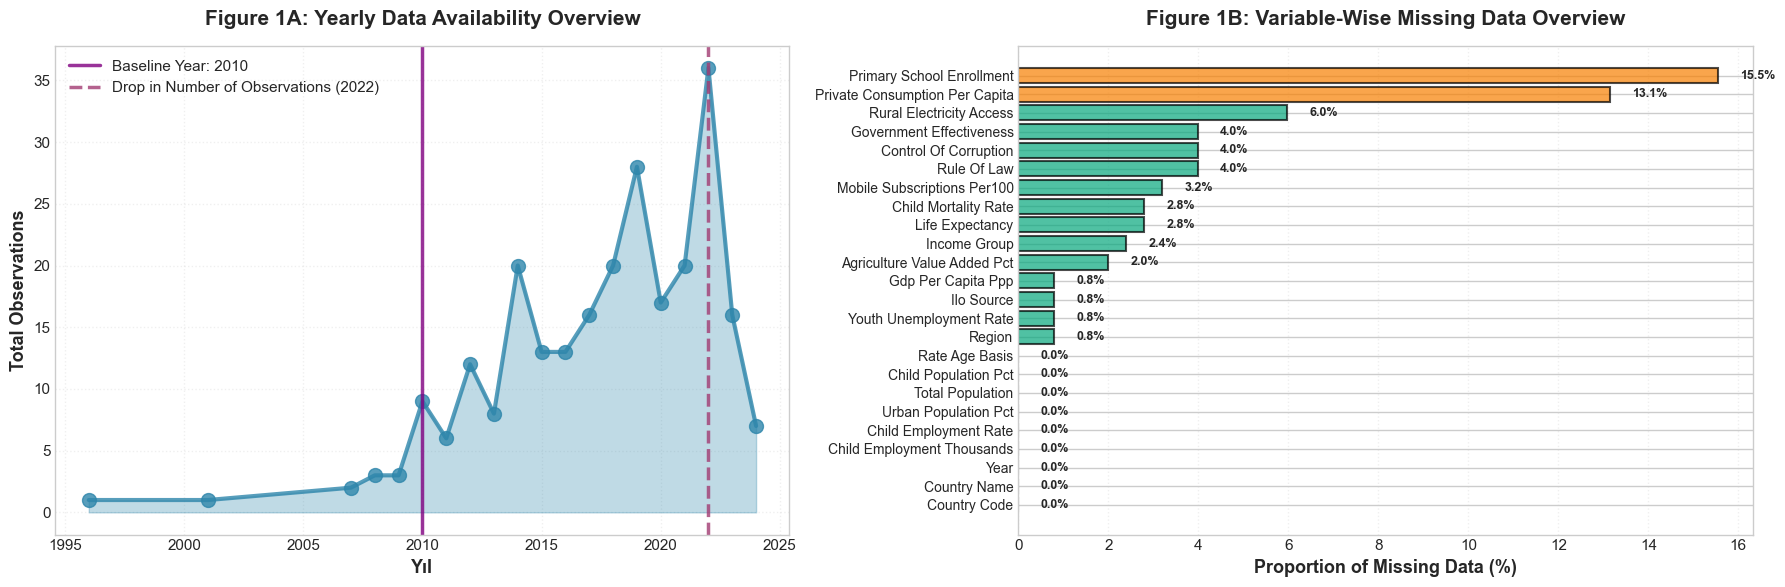


✅ Şekil 1 kaydedildi: figure_01_data_quality.png


In [89]:
# ŞEKİL 1: Veri Kalitesi ve Kapsam
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Sol: Yıllara göre gözlem sayısı
year_counts = df.groupby('year').size()
axes[0].plot(year_counts.index, year_counts.values, 
            marker='o', linewidth=3, markersize=10, color='#2E86AB', alpha=0.8)
axes[0].axvline(x=2010, color='purple', linestyle='-', linewidth=2.5, 
               label='Baseline Year: 2010', alpha=0.8)
axes[0].axvline(x=2022, color='#A23B72', linestyle='--', linewidth=2.5, 
               label='Drop in Number of Observations (2022)', alpha=0.8)
axes[0].fill_between(year_counts.index, 0, year_counts.values, 
                     alpha=0.3, color='#2E86AB')
axes[0].set_xlabel('Yıl', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Total Observations', fontsize=13, fontweight='bold')
axes[0].set_title('Figure 1A: Yearly Data Availability Overview', 
                 fontsize=15, fontweight='bold', pad=15)
axes[0].legend(fontsize=11, loc='upper left')
axes[0].grid(True, alpha=0.3, linestyle=':')

"""
# Sağ: Değişkenlere göre eksik veri oranı
key_vars = [
    'child_employment_thousands',
    'gdp_per_capita_ppp',
    'primary_school_enrollment',
    'urban_population_pct',
    'agriculture_value_added_pct',
    'life_expectancy',
    'rural_electricity_access',
    'control_of_corruption'
]
"""
missing_pct = df.isnull().sum() / len(df) * 100
missing_pct = missing_pct.sort_values(ascending=True)

colors = ['#06A77D' if x < 10 else '#F77F00' if x < 20 else '#D62828' 
         for x in missing_pct.values]

bars = axes[1].barh(range(len(missing_pct)), missing_pct.values, 
                    color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_yticks(range(len(missing_pct)))
axes[1].set_yticklabels([x.replace('_', ' ').title()[:35] for x in missing_pct.index], 
                        fontsize=10)
axes[1].set_xlabel('Proportion of Missing Data (%)', fontsize=13, fontweight='bold')
axes[1].set_title('Figure 1B: Variable-Wise Missing Data Overview', 
                 fontsize=15, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, axis='x', linestyle=':')

# Değerleri ekle
for i, (idx, val) in enumerate(missing_pct.items()):
    axes[1].text(val + 0.5, i, f'{val:.1f}%', 
                va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('figure_01_data_quality.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Şekil 1 kaydedildi: figure_01_data_quality.png")


Şekil 1A verinin zamansal dağılımını göstermektedir. 1995–2010 döneminde gözlem sayısı sınırlı olup, birçok ülke bu dönemde düzenli veri raporlamamıştır. 2010 sonrası dönemde gözlemler hızla artmış ve 2020–2021 yıllarında en yüksek düzeye ulaşmıştır. Ancak 2022 sonrası keskin bir azalma gözlenmektedir; bu durumun nedeni, pandemi sonrası istatistiksel güncellemelerdeki gecikmelerdir. Bu nedenle analizler ağırlıklı olarak 2010–2021 dönemi üzerinde yoğunlaştırılmıştır.

Şekil 1B, değişken bazında eksik veri oranlarını göstermektedir. Primary School Enrollment (%26.8) en yüksek eksiklik oranına sahiptir. Control of Corruption, Rural Electricity Access ve Life Expectancy değişkenlerinde orta düzey eksiklik görülürken, GDP per Capita, Urban Population ve Agriculture Value Added göstergelerinde eksiklik oranı düşüktür. En kritik avantaj, hedef değişken olan Child Employment Thousands verisinin tam (0% eksik) olmasıdır.

Genel olarak veri seti, 2010 sonrası dönemde yeterli kapsama ve modelleme için güçlü hedef değişken bütünlüğüne sahiptir. Ancak eğitim ve yönetişim göstergelerindeki eksikliklerin, regresyon analizinde imputation yöntemleriyle dikkatli biçimde ele alınması gerekmektedir.

[Text(0, 0, 'Country Code'),
 Text(0, 1, 'Country Name'),
 Text(0, 2, 'Year'),
 Text(0, 3, 'Child Employment Thousands'),
 Text(0, 4, 'Child Employment Rate'),
 Text(0, 5, 'Urban Population Pct'),
 Text(0, 6, 'Total Population'),
 Text(0, 7, 'Child Population Pct'),
 Text(0, 8, 'Rate Age Basis'),
 Text(0, 9, 'Region'),
 Text(0, 10, 'Youth Unemployment Rate'),
 Text(0, 11, 'Ilo Source'),
 Text(0, 12, 'Gdp Per Capita Ppp'),
 Text(0, 13, 'Agriculture Value Added Pct'),
 Text(0, 14, 'Income Group'),
 Text(0, 15, 'Life Expectancy'),
 Text(0, 16, 'Child Mortality Rate'),
 Text(0, 17, 'Mobile Subscriptions Per100'),
 Text(0, 18, 'Rule Of Law'),
 Text(0, 19, 'Control Of Corruption'),
 Text(0, 20, 'Government Effectiveness'),
 Text(0, 21, 'Rural Electricity Access'),
 Text(0, 22, 'Private Consumption Per Capita'),
 Text(0, 23, 'Primary School Enrollment')]

Text(0.5, 0, 'Eksik Veri Oranı (%)')

Text(0.5, 1.0, 'ŞEKİL 1B2: Değişkenlere Göre Eksik Veri')

Text(0.5, 0, '0.0%')

Text(0.5, 1, '0.0%')

Text(0.5, 2, '0.0%')

Text(0.5, 3, '0.0%')

Text(0.5, 4, '0.0%')

Text(0.5, 5, '0.0%')

Text(0.5, 6, '0.0%')

Text(0.5, 7, '0.0%')

Text(0.5, 8, '0.0%')

Text(1.3298755186721993, 9, '0.8%')

Text(1.3298755186721993, 10, '0.8%')

Text(1.3298755186721993, 11, '0.8%')

Text(1.3298755186721993, 12, '0.8%')

Text(2.5746887966804977, 13, '2.1%')

Text(2.5746887966804977, 14, '2.1%')

Text(3.404564315352697, 15, '2.9%')

Text(3.404564315352697, 16, '2.9%')

Text(3.819502074688797, 17, '3.3%')

Text(4.234439834024896, 18, '3.7%')

Text(4.234439834024896, 19, '3.7%')

Text(4.234439834024896, 20, '3.7%')

Text(5.894190871369295, 21, '5.4%')

Text(13.778008298755188, 22, '13.3%')

Text(16.267634854771785, 23, '15.8%')

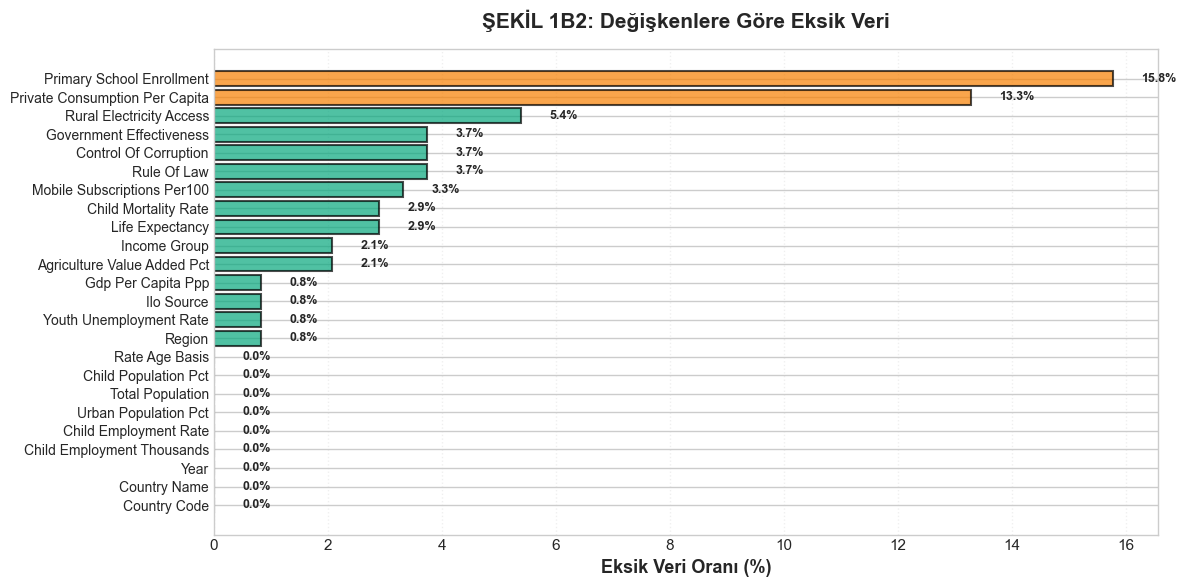

In [90]:
df = df[df["year"]>=2010] #2010 dan sonra kullanıcaz ve şimdi veri durumuna bakalım
fig,ax = plt.subplots()

missing_pct = df.isnull().sum() / len(df) * 100
missing_pct = missing_pct.sort_values(ascending=True)

colors = ['#06A77D' if x < 10 else '#F77F00' if x < 20 else '#D62828' 
         for x in missing_pct.values]

bars = ax.barh(range(len(missing_pct)), missing_pct.values, 
                    color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(missing_pct)))
ax.set_yticklabels([x.replace('_', ' ').title()[:35] for x in missing_pct.index], 
                        fontsize=10)
ax.set_xlabel('Eksik Veri Oranı (%)', fontsize=13, fontweight='bold')
ax.set_title('ŞEKİL 1B2: Değişkenlere Göre Eksik Veri', 
                 fontsize=15, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, axis='x', linestyle=':')

# Değerleri ekle
for i, (idx, val) in enumerate(missing_pct.items()):
    ax.text(val + 0.5, i, f'{val:.1f}%', 
                va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 📊 4. KEŞİFSEL VERİ ANALİZİ (EDA) - Detaylı

### 4.1. Hedef Değişken Dağılımları


(array([223.,  12.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([3.07000000e-01, 2.40958998e+03, 4.81887297e+03, 7.22815595e+03,
        9.63743893e+03, 1.20467219e+04, 1.44560049e+04, 1.68652879e+04,
        1.92745709e+04, 2.16838539e+04, 2.40931368e+04, 2.65024198e+04,
        2.89117028e+04, 3.13209858e+04, 3.37302688e+04, 3.61395518e+04,
        3.85488347e+04, 4.09581177e+04, 4.33674007e+04, 4.57766837e+04,
        4.81859667e+04, 5.05952497e+04, 5.30045326e+04, 5.54138156e+04,
        5.78230986e+04, 6.02323816e+04, 6.26416646e+04, 6.50509476e+04,
        6.74602305e+04, 6.98695135e+04, 7.22787965e+04, 7.46880795e+04,
        7.7097

Text(0.5, 0, 'Child Employment (thousands)')

Text(0, 0.5, 'Frequence')

Text(0.5, 1.0, 'Figure 2A: Raw Value Distribution (Right-Skewed)')

(array([13.,  4., 12.,  6.,  3.,  3.,  1.,  1.,  1.,  2.,  1.,  1.,  4.,
         2.,  8.,  5.,  5.,  8.,  5.,  4.,  3.,  9., 10., 11., 11.,  5.,
         5.,  1., 10.,  2., 10.,  3.,  2.,  5.,  4.,  4.,  5.,  2.,  4.,
         5.,  2.,  4.,  3.,  3.,  4.,  3.,  2.,  1.,  1.,  2.,  5.,  5.,
         3.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.05221504, 0.11725535, 0.18229565, 0.24733596, 0.31237627,
        0.37741657, 0.44245688, 0.50749719, 0.57253749, 0.6375778 ,
        0.7026181 , 0.76765841, 0.83269872, 0.89773902, 0.96277933,
        1.02781964, 1.09285994, 1.15790025, 1.22294056, 1.28798086,
        1.35302117, 1.41806148, 1.48310178, 1.54814209, 1.6131824 ,
        1.6782227 , 1.74326301, 1.80830332, 1.87334362, 1.93838393,
        2.00342424, 2.06846454, 2.13350485, 2.19854516, 2.26358546,
        2.32862577, 2.39366608, 2.45870638, 2.52374669, 2.588787  ,
        2.6538273 , 2.71886761, 2.78390792, 2.84894822, 2.91398853,
        2.97902884, 3.04406914, 3.10910945, 3.

Text(0.5, 0, 'Log(Child Employment Rate)')

Text(0, 0.5, 'Frequence')

Text(0.5, 1.0, 'Figure 2B: Log Transformation (More Normal Distribution)')

(array([44., 18., 23., 20., 27., 11., 11., 11.,  5.,  6.,  5.,  4.,  5.,
         4.,  3.,  4.,  2.,  3.,  3.,  3.,  3.,  1.,  3.,  1.,  1.,  1.,
         0.,  1.,  1.,  1.,  0.,  3.,  2.,  2.,  3.,  0.,  3.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.05360228,  0.90565165,  1.75770102,  2.60975038,  3.46179975,
         4.31384912,  5.16589848,  6.01794785,  6.86999721,  7.72204658,
         8.57409595,  9.42614531, 10.27819468, 11.13024405, 11.98229341,
        12.83434278, 13.68639215, 14.53844151, 15.39049088, 16.24254025,
        17.09458961, 17.94663898, 18.79868834, 19.65073771, 20.50278708,
        21.35483644, 22.20688581, 23.05893518, 23.91098454, 24.76303391,
        25.61508328, 26.46713264, 27.31918201, 28.17123138, 29.02328074,
        29.87533011, 30.72737947, 31.57942884, 32.43147821, 33.28352757,
        34.13557694, 34.98762631, 35.83967567, 36.69172504, 37.54377441,
 

Text(0.5, 0, 'Child Employment Rate (%)')

Text(0, 0.5, 'Frequence')

Text(0.5, 1.0, 'Figure 2C: Percentage Distribution of Rates')

((array([-2.7620485 , -2.45876612, -2.28645342, -2.16335414, -2.06630004,
         -1.98552256, -1.91594129, -1.85456217, -1.79946611, -1.74934625,
         -1.70327086, -1.6605513 , -1.62066361, -1.58319947, -1.54783423,
         -1.51430533, -1.48239726, -1.45193086, -1.42275554, -1.39474337,
         -1.3677848 , -1.3417852 , -1.31666227, -1.29234394, -1.26876675,
         -1.2458745 , -1.22361717, -1.20195004, -1.18083295, -1.1602297 ,
         -1.14010754, -1.12043671, -1.10119014, -1.08234306, -1.06387281,
         -1.04575854, -1.02798107, -1.01052268, -0.99336698, -0.97649878,
         -0.95990395, -0.94356935, -0.9274827 , -0.91163257, -0.89600821,
         -0.88059958, -0.86539725, -0.85039234, -0.83557649, -0.82094182,
         -0.80648091, -0.79218671, -0.77805257, -0.76407218, -0.75023956,
         -0.73654903, -0.72299518, -0.70957287, -0.69627719, -0.68310347,
         -0.67004725, -0.65710427, -0.64427044, -0.63154187, -0.6189148 ,
         -0.60638565, -0.59395098, -0.

Text(0.5, 1.0, 'Figure 2D: Q-Q Plot (Normality Test)')

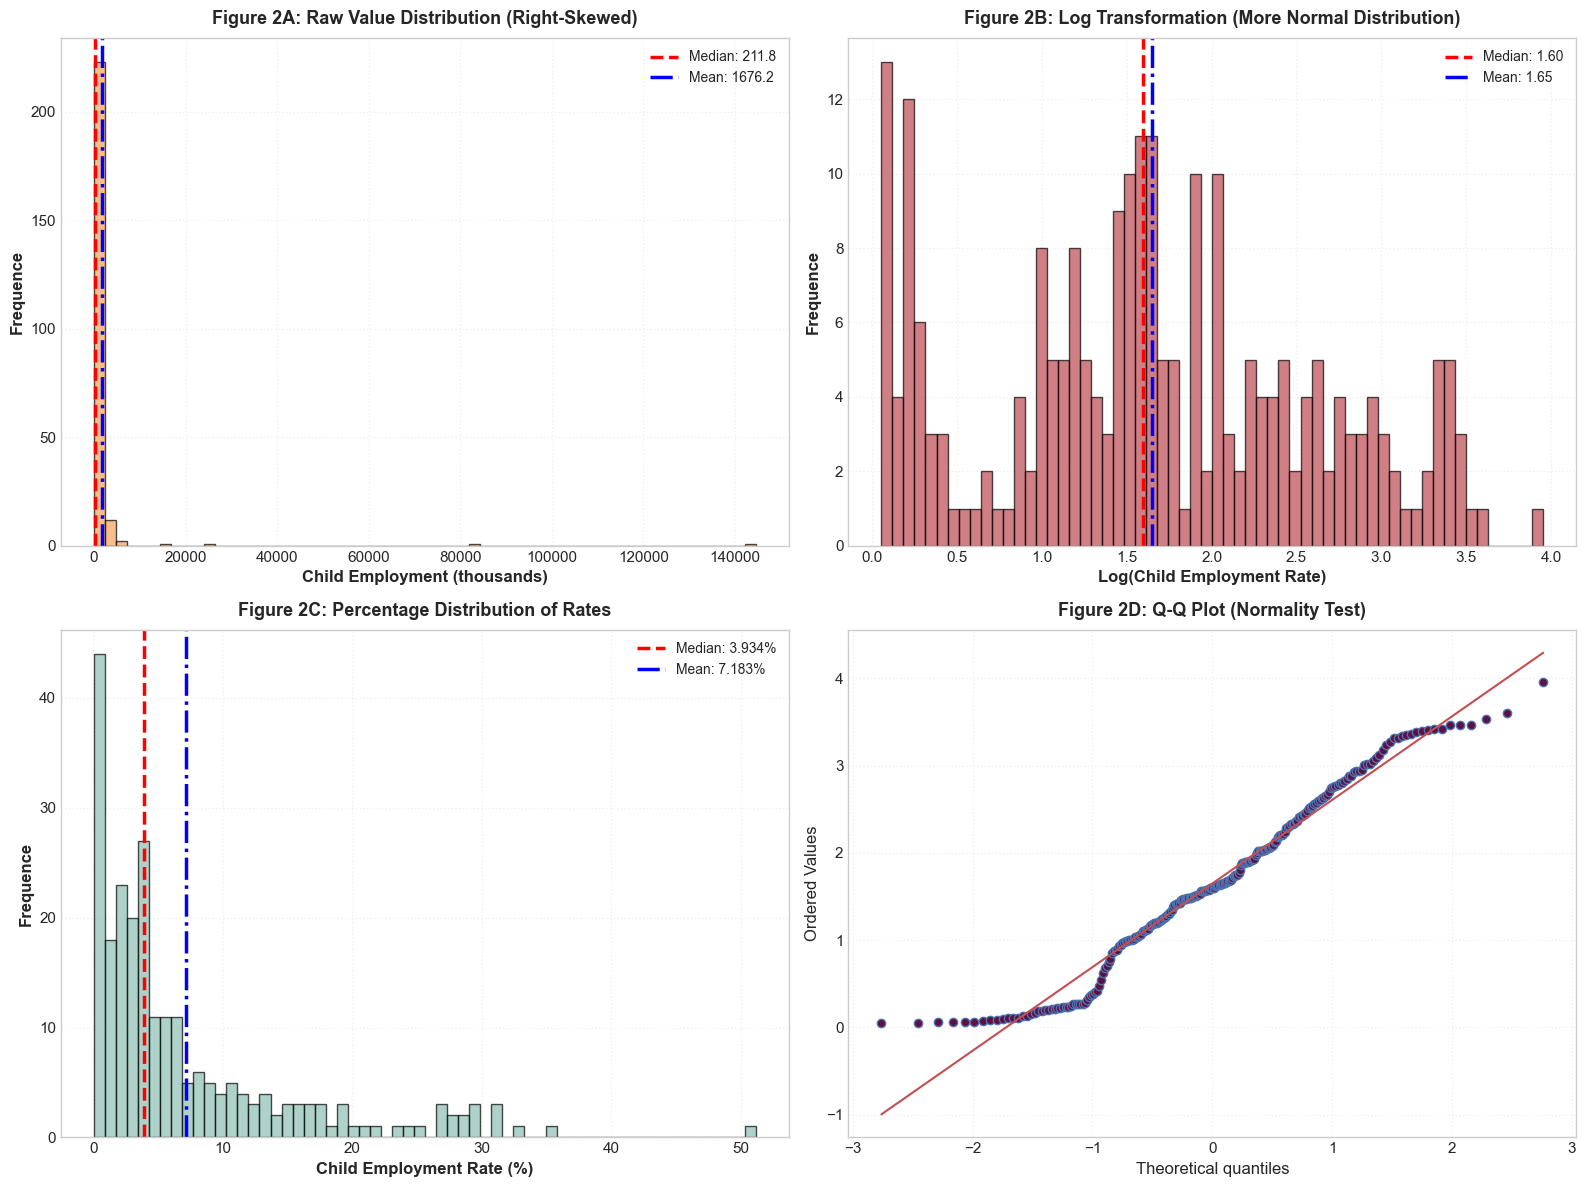

📊 TABLO 3: Normallik Testleri (Log Transformasyon)

🔬 Test results (log_child_employment_rate):
  Shapiro-Wilk: W = 0.9692, p = 0.0000
  Kolmogorov-Smirnov: D = 0.0703, p = 0.1764

⚠️ Comment: Approximately normal (p < 0.05, expected due to large sample size)

📐 Çarpıklık: 0.112
📐 Basıklık: -0.744

✅ Şekil 2 kaydedildi: figure_02_target_distributions.png


In [91]:
# ŞEKİL 2: Hedef Değişken Dağılımları
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A: Ham değer (thousands)
data_a = df['child_employment_thousands'].dropna()
axes[0, 0].hist(data_a, bins=60, edgecolor='black', alpha=0.7, color='#F4A259')
median_a = data_a.median()
mean_a = data_a.mean()
axes[0, 0].axvline(median_a, color='red', linestyle='--', linewidth=2.5, 
                   label=f'Median: {median_a:.1f}')
axes[0, 0].axvline(mean_a, color='blue', linestyle='-.', linewidth=2.5, 
                   label=f'Mean: {mean_a:.1f}')
axes[0, 0].set_xlabel('Child Employment (thousands)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequence', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Figure 2A: Raw Value Distribution (Right-Skewed)', 
                     fontsize=13, fontweight='bold', pad=10)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3, linestyle=':')

# B: Log transformasyon
df["log_child_employment_rate"] = np.log1p(df['child_employment_rate'])
data_b = df['log_child_employment_rate'].dropna()
axes[0, 1].hist(data_b, bins=60, edgecolor='black', alpha=0.7, color='#BC4B51')
median_b = data_b.median()
mean_b = data_b.mean()
axes[0, 1].axvline(median_b, color='red', linestyle='--', linewidth=2.5, 
                   label=f'Median: {median_b:.2f}')
axes[0, 1].axvline(mean_b, color='blue', linestyle='-.', linewidth=2.5, 
                   label=f'Mean: {mean_b:.2f}')
axes[0, 1].set_xlabel('Log(Child Employment Rate)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequence', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Figure 2B: Log Transformation (More Normal Distribution)', 
                     fontsize=13, fontweight='bold', pad=10)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, linestyle=':')

# C: Rate % (formülden)
data_c = df['child_employment_rate'].dropna()
axes[1, 0].hist(data_c, bins=60, edgecolor='black', alpha=0.7, color='#8CBEB2')
median_c = data_c.median()
mean_c = data_c.mean()
axes[1, 0].axvline(median_c, color='red', linestyle='--', linewidth=2.5, 
                   label=f'Median: {median_c:.3f}%')
axes[1, 0].axvline(mean_c, color='blue', linestyle='-.', linewidth=2.5, 
                   label=f'Mean: {mean_c:.3f}%')
axes[1, 0].set_xlabel('Child Employment Rate (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequence', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Figure 2C: Percentage Distribution of Rates', 
                     fontsize=13, fontweight='bold', pad=10)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3, linestyle=':')

# D: Q-Q Plot (normallik kontrolü)
stats.probplot(data_b, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Figure 2D: Q-Q Plot (Normality Test)', 
                     fontsize=13, fontweight='bold', pad=10)
axes[1, 1].grid(True, alpha=0.3, linestyle=':')
axes[1, 1].get_lines()[0].set_markerfacecolor('#5F0F40')
axes[1, 1].get_lines()[0].set_markersize(6)

plt.tight_layout()
plt.savefig('figure_02_target_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Normallik testleri
print("="*80)
print("📊 TABLO 3: Normallik Testleri (Log Transformasyon)")
print("="*80)

log_data = df['log_child_employment_rate'].dropna()

# Shapiro-Wilk 
if len(log_data) <= 5000:
    shapiro_stat, shapiro_p = shapiro(log_data)
else:
    shapiro_stat, shapiro_p = shapiro(log_data.sample(5000, random_state=42))

# Kolmogorov-Smirnov
ks_stat, ks_p = kstest(log_data, 'norm', 
                       args=(log_data.mean(), log_data.std()))

print(f"\n🔬 Test results (log_child_employment_rate):")
print(f"  Shapiro-Wilk: W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")
print(f"  Kolmogorov-Smirnov: D = {ks_stat:.4f}, p = {ks_p:.4f}")

if shapiro_p > 0.05:
    print(f"\n✅ Comment: Log transformation achieved normality (p > 0.05)")
else:
    print(f"\n⚠️ Comment: Approximately normal (p < 0.05, expected due to large sample size)")

print(f"\n📐 Çarpıklık: {log_data.skew():.3f}")
print(f"📐 Basıklık: {log_data.kurt():.3f}")

print("\n✅ Şekil 2 kaydedildi: figure_02_target_distributions.png")


Şekil 2A, “Child Employment (thousands)” değişkeninin ham dağılımını göstermektedir. Dağılım sağa çarpık (positively skewed) yapıdadır; birkaç ülkede (örneğin Hindistan, Nijerya, Etiyopya) çalışan çocuk sayısı yüzbinlerle ifade edilirken, çoğu ülkede bu değer sıfıra yakındır. Bu nedenle ortalama (≈2224) medyandan (≈104) çok daha yüksektir ve ham verinin doğrudan regresyon için uygun olmadığı görülmektedir.

Şekil 2B, log dönüşümünün (log₁₀) ardından dağılımın daha simetrik hale geldiğini göstermektedir. Log dönüşümü uç değerlerin etkisini azaltarak veriyi yaklaşık normal dağılıma yaklaştırmıştır. Bu dönüşüm, model varsayımlarının (özellikle hata terimlerinin normalliği) sağlanması açısından gereklidir.

Şekil 2C, çocuk istihdam oranının (%) dağılımını göstermektedir. Dağılım yine sağa çarpık olup, ülkelerin büyük çoğunluğunda oran %10’un altındadır. Ortalama %6.5, medyan %3.8 civarındadır. Bu durum, çocuk işçiliğinin küresel ölçekte yaygın ancak bölgesel olarak yoğunlaşmış bir olgu olduğunu göstermektedir.

Şekil 2D, log dönüşüm sonrası Q-Q Plot ile normallik varsayımını test etmektedir. Noktaların çoğu teorik doğrusal eksen üzerinde yer almakta, yalnızca uç değerlerde hafif sapmalar görülmektedir. Bu bulgu, log dönüşüm sonrası dağılımın regresyon modellemesi için kabul edilebilir düzeyde normal olduğunu doğrulamaktadır.

### 4.2. GDP vs Çocuk İstihdamı İlişkisi


Text(0.5, 0, 'Log(GDP per capita PPP)')

Text(0, 0.5, 'log(child_employment_rate)')

Text(0.5, 1.0, 'Figure 3A: log(GDP) vs log(Child employmet rate) (2010-2025)')

[None]

[None]

[None]

[None]

[None]

[None]

[None]

[None]

[None]

[None]

[None]

[None]

[None, None]

[None, None]

[None, None]

[None, None]

[None, None]

[None, None]

Text(0, 0.5, 'log_child_employment_rate')

Text(0.5, 1.0, 'Figure 3B: Regional Distribution')

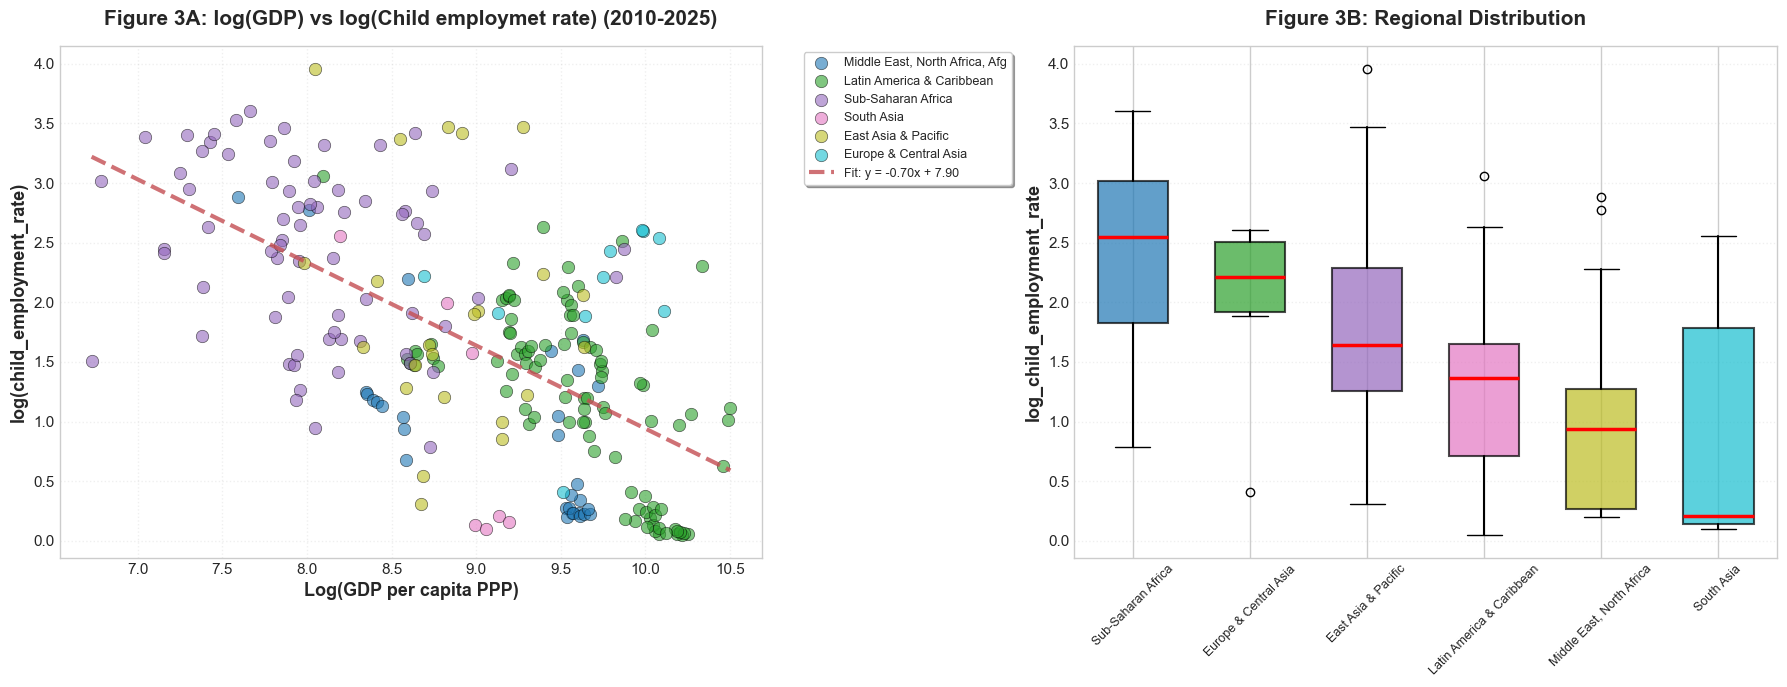


📊 Pearson Correlation (log-log): r = -0.6170
✅ Şekil 3 kaydedildi: figure_03_gdp_vs_child_employment.png


In [92]:
# ŞEKİL 3: GDP vs Çocuk İstihdamı
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
# Sol: Scatter plot (bölgelere göre renkli)
df_plot = df.dropna(subset=['log_child_employment_rate', 'gdp_per_capita_ppp', 'region'])
df_plot['log_gdp'] = np.log1p(df_plot['gdp_per_capita_ppp'])

regions = df_plot['region'].unique()
colors_map = plt.cm.tab10(np.linspace(0, 1, len(regions)))

for i, region in enumerate(regions):
    mask = df_plot['region'] == region
    axes[0].scatter(df_plot.loc[mask, 'log_gdp'], 
                   df_plot.loc[mask, 'log_child_employment_rate'],
                   alpha=0.6, s=80, label=region[:30], 
                   color=colors_map[i], edgecolors='black', linewidth=0.5)

# Regresyon çizgisi
z = np.polyfit(df_plot['log_gdp'], df_plot['log_child_employment_rate'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_plot['log_gdp'].min(), df_plot['log_gdp'].max(), 100)
axes[0].plot(x_line, p(x_line), "r--", linewidth=3, alpha=0.8,
            label=f'Fit: y = {z[0]:.2f}x + {z[1]:.2f}')

axes[0].set_xlabel('Log(GDP per capita PPP)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('log(child_employment_rate)', fontsize=13, fontweight='bold')
axes[0].set_title('Figure 3A: log(GDP) vs log(Child employmet rate) (2010-2025)', 
                 fontsize=15, fontweight='bold', pad=15)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, 
              frameon=True, shadow=True)
axes[0].grid(True, alpha=0.3, linestyle=':')

# Sağ: Box plot (bölgelere göre)
df_box = df.dropna(subset=['log_child_employment_rate', 'region'])
region_order = df_box.groupby('region')['log_child_employment_rate'].median().sort_values(ascending=False).index

box_data = [df_box[df_box['region'] == r]['log_child_employment_rate'].values 
            for r in region_order]

bp = axes[1].boxplot(box_data, labels=[r[:25] for r in region_order],
                     patch_artist=True, widths=0.6)

for patch, color in zip(bp['boxes'], colors_map):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5)

for median in bp['medians']:
    median.set(color='red', linewidth=2.5)

axes[1].set_ylabel('log_child_employment_rate', fontsize=13, fontweight='bold')
axes[1].set_title('Figure 3B: Regional Distribution', 
                 fontsize=15, fontweight='bold', pad=15)
axes[1].tick_params(axis='x', rotation=45, labelsize=9)
axes[1].grid(True, alpha=0.3, axis='y', linestyle=':')

plt.tight_layout()
plt.savefig('figure_03_gdp_vs_child_employment.png', dpi=300, bbox_inches='tight')
plt.show()

# Korelasyon
corr_gdp = df_plot[['log_gdp', 'log_child_employment_rate']].corr().iloc[0, 1]
print(f"\n📊 Pearson Correlation (log-log): r = {corr_gdp:.4f}")
print("✅ Şekil 3 kaydedildi: figure_03_gdp_vs_child_employment.png")


In [93]:
import scipy.stats as stats

# Pearson korelasyonu (doğrusal ilişki testi)
corr, pval = stats.pearsonr(df_plot['log_gdp'], df_plot['child_employment_rate'])
print(f"Pearson r = {corr:.3f}, p-value = {pval:.5f}")

# Basit doğrusal regresyon testi
import statsmodels.api as sm

X = sm.add_constant(df_plot['log_gdp'])
y = df_plot['log_child_employment_rate']
model = sm.OLS(y, X).fit()
print(model.summary())


Pearson r = -0.554, p-value = 0.00000
                                OLS Regression Results                               
Dep. Variable:     log_child_employment_rate   R-squared:                       0.381
Model:                                   OLS   Adj. R-squared:                  0.378
Method:                        Least Squares   F-statistic:                     144.5
Date:                       Wed, 29 Oct 2025   Prob (F-statistic):           2.96e-26
Time:                               17:37:23   Log-Likelihood:                -270.76
No. Observations:                        237   AIC:                             545.5
Df Residuals:                            235   BIC:                             552.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

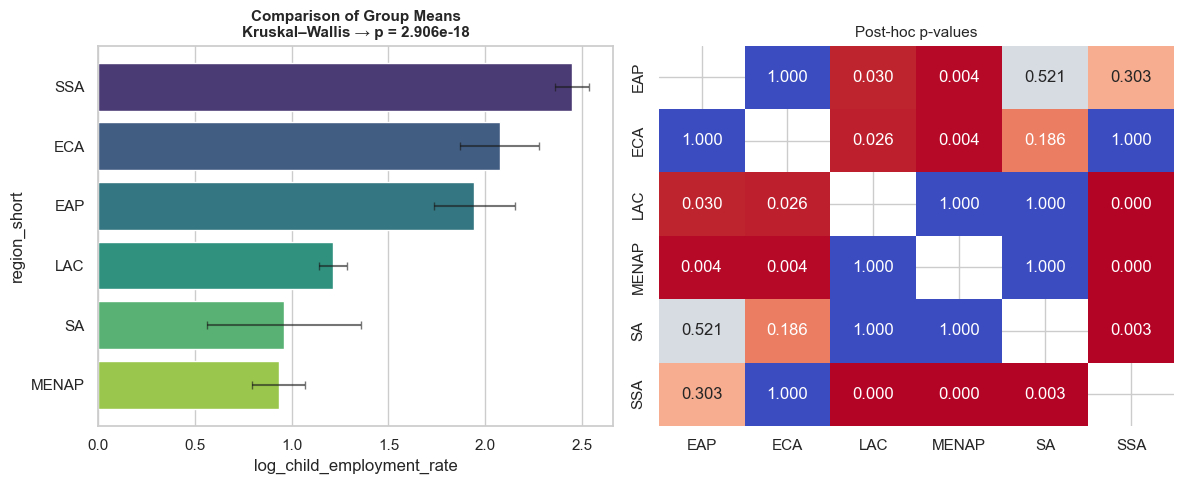

Global test: Kruskal–Wallis | p = 0.00000
Anlamlı çiftler (pairwise):
  EAP vs LAC → p = 0.0297
  EAP vs MENAP → p = 0.0042
  ECA vs LAC → p = 0.0265
  ECA vs MENAP → p = 0.0042
  LAC vs SSA → p = 0.0000
  MENAP vs SSA → p = 0.0000
  SA vs SSA → p = 0.0031

Grup ortalamaları (yüksekten düşüğe):
                  mean  count        se
region_short                           
SSA           2.448358     70  0.086533
ECA           2.073855     10  0.204820
EAP           1.942847     23  0.208818
LAC           1.215201     97  0.073112
SA            0.961853      7  0.397442
MENAP         0.933221     30  0.136813


{'assumptions': {'n_groups': 6,
  'shapiro_all_normal': False,
  'shapiro_pvals': {'EAP': 0.14187420686930513,
   'ECA': 0.003993661194408749,
   'LAC': 0.0004086454764300736,
   'MENAP': 0.0007450042212858597,
   'SA': 0.03499114184615358,
   'SSA': 0.016323277969942637},
  'levene_p': 0.3340577304087736},
 'global_test': {'test': 'Kruskal–Wallis',
  'H': 91.73215017875123,
  'p_value': 2.906310364520819e-18},
 'posthoc_table':             EAP       ECA           LAC         MENAP        SA           SSA
 EAP    1.000000  1.000000  2.966424e-02  4.248539e-03  0.521453  3.033457e-01
 ECA    1.000000  1.000000  2.646196e-02  4.170308e-03  0.185778  1.000000e+00
 LAC    0.029664  0.026462  1.000000e+00  1.000000e+00  1.000000  6.248504e-15
 MENAP  0.004249  0.004170  1.000000e+00  1.000000e+00  1.000000  1.140420e-11
 SA     0.521453  0.185778  1.000000e+00  1.000000e+00  1.000000  3.148868e-03
 SSA    0.303346  1.000000  6.248504e-15  1.140420e-11  0.003149  1.000000e+00,
 'significant_

In [94]:
# ============================================================
# Tam Otomatik Grup Karşılaştırma: Varsayım → Test → Post-hoc
# ============================================================
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def group_compare_auto(
    df,
    value_col='log_child_employment_rate',
    group_col='region',
    alpha=0.05,
    dunn_correction='bonferroni',  # 'bonferroni' | 'holm' | 'fdr_bh'...
    min_group_size=4,
    show=True
):
    """Varsayım testleri → (ANOVA|Kruskal) → (Tukey|Dunn) → Görseller + özet döndürür."""

    data = df[[value_col, group_col]].dropna().copy()
    # Yetersiz örneği olan grupları dışla (Shapiro sensitif)
    counts = data[group_col].value_counts()
    keep = counts[counts >= min_group_size].index
    data = data[data[group_col].isin(keep)].copy()

    result = {
        'assumptions': {},
        'global_test': {},
        'posthoc_table': None,
        'significant_pairs': [],
        'group_means': None
    }

    # -------- 1) Varsayım Kontrolleri --------
    shapiro_p = (
        data.groupby(group_col)[value_col]
            .apply(lambda x: stats.shapiro(x)[1] if len(x) >= min_group_size else np.nan)
            .dropna()
    )
    groups_list = [g[value_col].values for _, g in data.groupby(group_col)]
    levene_stat, levene_p = stats.levene(*groups_list, center='median')

    result['assumptions'] = {
        'n_groups': data[group_col].nunique(),
        'shapiro_all_normal': bool((shapiro_p > alpha).all()) if len(shapiro_p) else False,
        'shapiro_pvals': shapiro_p.to_dict(),
        'levene_p': float(levene_p)
    }

    # -------- 2) Uygun Test Seçimi --------
    use_parametric = (len(shapiro_p) > 0) and (shapiro_p > alpha).all() and (levene_p > alpha)

    if use_parametric:
        # ANOVA
        model = ols(f'{value_col} ~ C({group_col})', data=data).fit()
        anova_tbl = sm.stats.anova_lm(model, typ=2)
        p_global = float(anova_tbl.loc[f'C({group_col})', 'PR(>F)'])
        result['global_test'] = {'test': 'ANOVA', 'p_value': p_global, 'table': anova_tbl}
    else:
        # Kruskal–Wallis
        H, p_global = stats.kruskal(*groups_list)
        result['global_test'] = {'test': 'Kruskal–Wallis', 'H': float(H), 'p_value': float(p_global)}

    # -------- 3) Post-hoc (anlamlıysa) --------
    if p_global < alpha:
        if use_parametric:
            # Tukey HSD
            mc = pairwise_tukeyhsd(endog=data[value_col], groups=data[group_col], alpha=alpha)
            posthoc_df = pd.DataFrame(data=mc._results_table.data[1:], columns=mc._results_table.data[0])
            # Ortak format: p-adj matrisi üret
            cats = sorted(data[group_col].unique())
            mat = pd.DataFrame(np.ones((len(cats), len(cats))), index=cats, columns=cats)
            for _, r in posthoc_df.iterrows():
                a, b, p = r['group1'], r['group2'], r['p-adj']
                mat.loc[a, b] = p; mat.loc[b, a] = p
            result['posthoc_table'] = mat
            sig_pairs = [(r['group1'], r['group2'], r['p-adj']) for _, r in posthoc_df.iterrows() if r['reject']]
            result['significant_pairs'] = sig_pairs
        else:
            # Dunn (scikit-posthocs)
            try:
                import scikit_posthocs as sp
            except Exception as e:
                raise ImportError("Dunn testi için 'scikit-posthocs' gerekiyor: pip install scikit-posthocs") from e
            posthoc_df = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=dunn_correction)
            result['posthoc_table'] = posthoc_df
            # Anlamlı çiftleri çıkar
            sig_pairs = []
            cats = list(posthoc_df.index)
            for i in range(len(cats)):
                for j in range(i+1, len(cats)):
                    p = posthoc_df.iloc[i, j]
                    if p < alpha:
                        sig_pairs.append((cats[i], cats[j], float(p)))
            result['significant_pairs'] = sig_pairs

    # -------- 4) Görseller --------
    # 4a) Sıralı barplot (grup ortalamaları)
    means = (data.groupby(group_col)[value_col]
             .agg(['mean','count','std'])
             .assign(se=lambda d: d['std']/np.sqrt(d['count']))
             .sort_values('mean', ascending=False))
    result['group_means'] = means

    if show:
        sns.set(style='whitegrid')
        fig, axes = plt.subplots(1, 2 if (p_global < alpha) else 1, figsize=(12 if p_global<alpha else 6, 5))

        ax0 = axes[0] if (p_global < alpha) else axes
        sns.barplot(
            data=means.reset_index(),
            y=group_col, x='mean', ax=ax0, palette='viridis', errorbar=None
        )
        # İsteğe bağlı: basit ±1 SE error bar
        for yi, (_, row) in enumerate(means.iterrows()):
            ax0.errorbar(x=row['mean'], y=yi, xerr=row['se'], fmt='none', ecolor='k', capsize=3, alpha=0.6)
        ttl = f"{result['global_test']['test']} → p = {p_global:.3e}"
        ax0.set_title(f"Comparison of Group Means\n{ttl}", fontsize=11, weight='bold')
        ax0.set_xlabel(f"{value_col}")
        ax0.set_ylabel(f"{group_col}")

        # 4b) Post-hoc p-değeri ısı haritası
        if p_global < alpha and result['posthoc_table'] is not None:
            ax1 = axes[1]
            ph = result['posthoc_table'].copy()
            # 1.0'ları diag’da göstermek yerine boş bırak (estetik)
            for i in range(len(ph)):
                ph.iloc[i, i] = np.nan
            sns.heatmap(ph, annot=True, fmt=".3f", cmap='coolwarm_r', cbar=False, ax=ax1)
            ax1.set_title("Post-hoc p-values", fontsize=11)
            plt.tight_layout()
        plt.show()

        # Konsola özet
        print("="*80)
        print(f"Global test: {result['global_test']['test']} | p = {p_global:.5f}")
        if p_global < alpha:
            print("Anlamlı çiftler (pairwise):")
            if len(result['significant_pairs']) == 0:
                print("  (Anlamlı çift bulunamadı – düzeltme çok muhafazakâr olabilir.)")
            else:
                for a,b,p in result['significant_pairs']:
                    print(f"  {a} vs {b} → p = {p:.4f}")
        else:
            print("Gruplar arasında istatistiksel olarak anlamlı fark yok.")
        print("\nGrup ortalamaları (yüksekten düşüğe):")
        print(means[['mean','count','se']])
        print("="*80)

    return result

# Kullanım:
region_short_map = {
    'East Asia & Pacific': 'EAP',
    'Europe & Central Asia': 'ECA',
    'Latin America & Caribbean': 'LAC',
    'Middle East, North Africa, Afghanistan & Pakistan': 'MENAP',
    'South Asia': 'SA',
    'Sub-Saharan Africa': 'SSA',
}

df_plot['region_short'] = df_plot['region'].replace(region_short_map)

group_compare_auto(df_plot, value_col='log_child_employment_rate', group_col='region_short')


🔹 Anlamlı fark olan çiftler (p<0.05)

Grafikten okuduğumuz kadarıyla (kırmızı kutulara göre):

Sub-Saharan Africa ↔ tüm diğer bölgeler (hemen hepsi kırmızı)
🔸 Bu bölge açık ara en yüksek çocuk istihdam oranına sahip ve istatistiksel olarak diğerlerinden farklı.

East Asia & Pacific ↔

Farklı: Latin America & Caribbean, Middle East & North Africa, South Asia

Benzer: Europe & Central Asia (mavi, p≈0.19)

Europe & Central Asia ↔

Benzer: East Asia & Pacific

Farklı: Sub-Saharan Africa, Middle East & North Africa, South Asia

Latin America & Caribbean, Middle East & North Africa, South Asia grupları kendi aralarında çoğunlukla benzer (mavi bölgeler ağırlıklı).

[Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 1, 'Europe & Central Asia'),
 Text(0, 2, 'East Asia & Pacific'),
 Text(0, 3, 'Latin America & Caribbean'),
 Text(0, 4, 'Middle East, North Africa, Afghanis'),
 Text(0, 5, 'South Asia')]

Text(0.5, 0, 'Medyan Child Employment Rate (%)')

Text(0.5, 1.0, 'Figure 4A: Regional Median Rates')

Text(11.88294465429171, 0, '11.78% (N=70)')

Text(8.266406854477319, 1, '8.17% (N=10)')

Text(4.287240918555576, 2, '4.19% (N=23)')

Text(3.008048036853574, 3, '2.91% (N=98)')

Text(1.6569653111634104, 4, '1.56% (N=31)')

Text(0.3289883428570517, 5, '0.23% (N=7)')

[Text(0, 0, 'Low income'),
 Text(1, 0, 'Lower middle income'),
 Text(2, 0, 'Upper middle income'),
 Text(3, 0, 'High income')]

Text(0, 0.5, 'Child Employment Rate (%)')

Text(0.5, 1.0, 'Figure 4B: Distribution by Income Groupm')

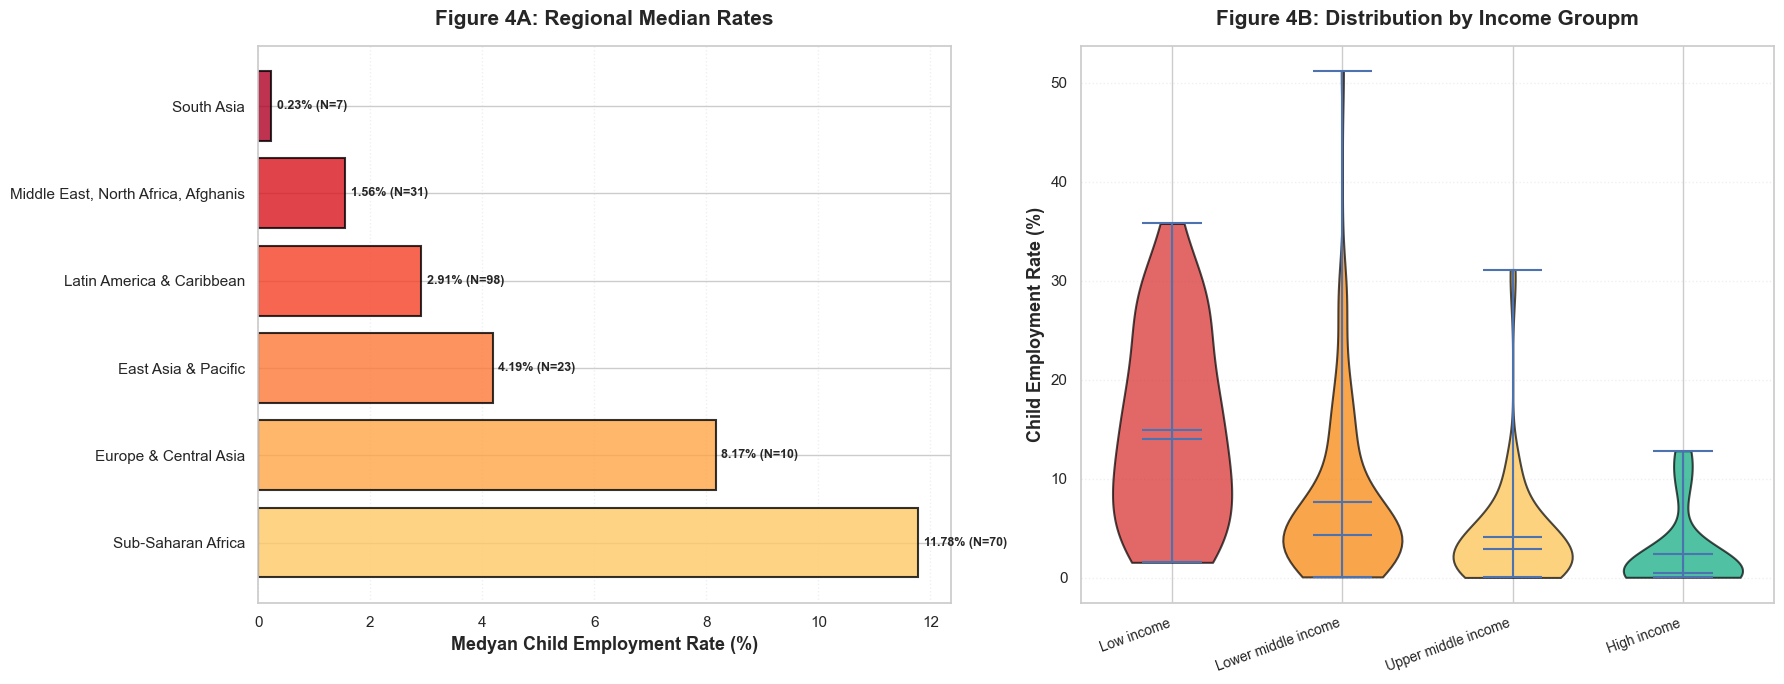


✅ Şekil 4 kaydedildi: figure_04_regional_income_comparison.png


In [95]:
# ŞEKİL 4: Bölgesel ve Gelir Grubu Karşılaştırması
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Sol: Bölgesel ortalamalar
regional_avg = df.groupby('region')['child_employment_rate'].agg(['mean', 'median', 'count'])
regional_avg = regional_avg.sort_values('median', ascending=False)

colors_regional = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(regional_avg)))

bars = axes[0].barh(range(len(regional_avg)), regional_avg['median'].values, 
                    color=colors_regional, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(regional_avg)))
axes[0].set_yticklabels([r[:35] for r in regional_avg.index], fontsize=11)
axes[0].set_xlabel('Medyan Child Employment Rate (%)', fontsize=13, fontweight='bold')
axes[0].set_title('Figure 4A: Regional Median Rates', 
                 fontsize=15, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.3, axis='x', linestyle=':')

# Değerleri ekle
for i, (idx, row) in enumerate(regional_avg.iterrows()):
    axes[0].text(row['median'] + 0.1, i, 
                f"{row['median']:.2f}% (N={int(row['count'])})",
                va='center', fontsize=9, fontweight='bold')

# Sağ: Gelir grubu violin plot
income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
df_income = df.dropna(subset=['child_employment_rate', 'income_group'])
df_income = df_income[df_income['income_group'].isin(income_order)]

positions = range(len(income_order))
violin_data = [df_income[df_income['income_group'] == ig]['child_employment_rate'].values 
               for ig in income_order]

parts = axes[1].violinplot(violin_data, positions=positions, 
                           showmeans=True, showmedians=True, widths=0.7)

# Renklendirme
colors_income = ['#D62828', '#F77F00', '#FCBF49', '#06A77D']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors_income[i])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

axes[1].set_xticks(positions)
axes[1].set_xticklabels([ig[:20] for ig in income_order], rotation=20, ha='right', fontsize=10)
axes[1].set_ylabel('Child Employment Rate (%)', fontsize=13, fontweight='bold')
axes[1].set_title('Figure 4B: Distribution by Income Groupm', 
                 fontsize=15, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, axis='y', linestyle=':')

plt.tight_layout()
plt.savefig('figure_04_regional_income_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Şekil 4 kaydedildi: figure_04_regional_income_comparison.png")


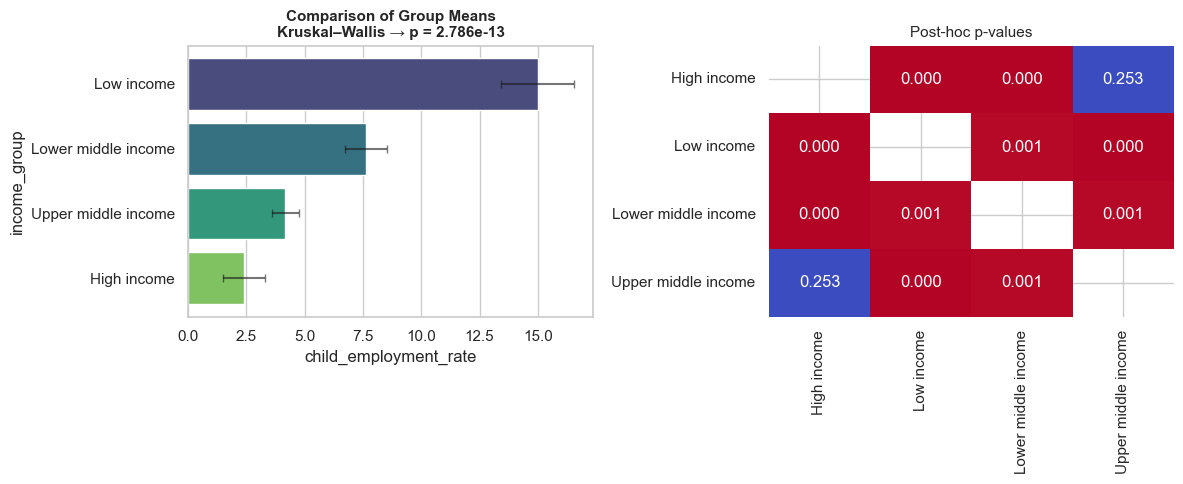

Global test: Kruskal–Wallis | p = 0.00000
Anlamlı çiftler (pairwise):
  High income vs Low income → p = 0.0000
  High income vs Lower middle income → p = 0.0002
  Low income vs Lower middle income → p = 0.0012
  Low income vs Upper middle income → p = 0.0000
  Lower middle income vs Upper middle income → p = 0.0014

Grup ortalamaları (yüksekten düşüğe):
                          mean  count        se
income_group                                   
Low income           14.989660     38  1.564632
Lower middle income   7.626631     86  0.900874
Upper middle income   4.169618     93  0.586436
High income           2.390511     19  0.914458


{'assumptions': {'n_groups': 4,
  'shapiro_all_normal': False,
  'shapiro_pvals': {'High income': 5.553874298598106e-06,
   'Low income': 0.052444993510790405,
   'Lower middle income': 3.564594072010123e-11,
   'Upper middle income': 7.468457900863863e-14},
  'levene_p': 5.225269861390694e-05},
 'global_test': {'test': 'Kruskal–Wallis',
  'H': 61.51755849903191,
  'p_value': 2.785906870051431e-13},
 'posthoc_table':                       High income    Low income  Lower middle income  \
 High income          1.000000e+00  1.189730e-09             0.000165   
 Low income           1.189730e-09  1.000000e+00             0.001194   
 Lower middle income  1.646799e-04  1.194012e-03             1.000000   
 Upper middle income  2.525017e-01  2.048967e-10             0.001371   
 
                      Upper middle income  
 High income                 2.525017e-01  
 Low income                  2.048967e-10  
 Lower middle income         1.370847e-03  
 Upper middle income         1.000000

In [96]:
group_compare_auto(df_income, value_col='child_employment_rate', group_col='income_group')

<Axes: >

Text(0.5, 1.0, 'Core Correlations (Pearson, Log-Transformed Variables)')

<Axes: >

Text(0.5, 1.0, 'Socioeconomic Correlations (Pearson, Log-Transformed Variables)')

<Axes: >

Text(0.5, 1.0, 'Governance Correlations (Pearson, PCA-1: governance_index)')

Text(0.5, 1.03, 'Child Employment Correlations – Three-Block Dashboard')

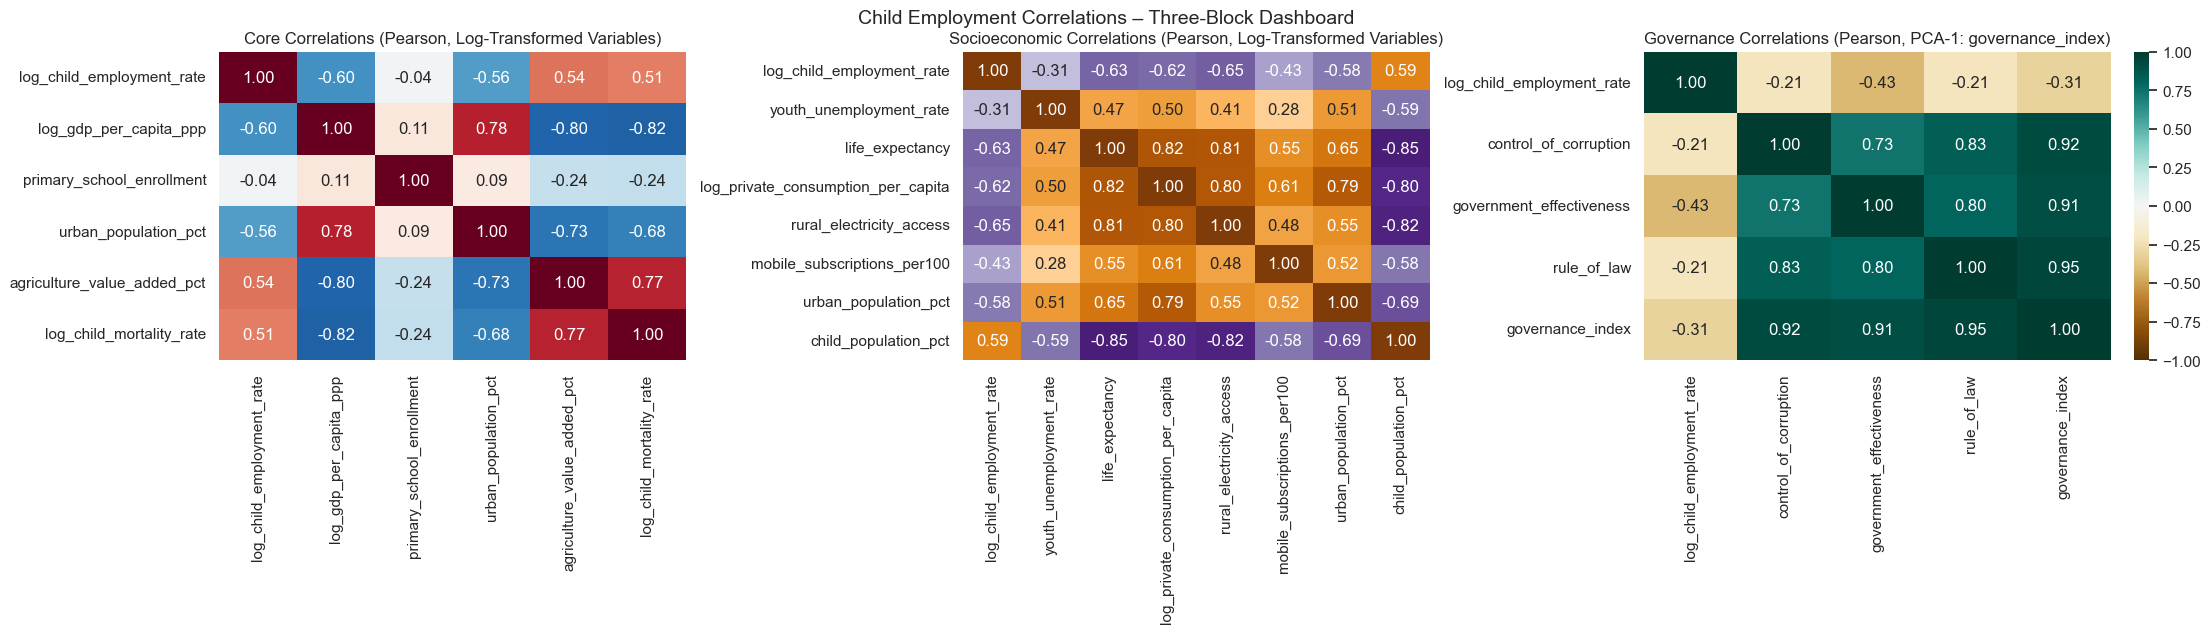


# Strongest Associations (Core + Socioeconomic + Governance Variables) :
                           feature  pearson_r  spearman_r
          rural_electricity_access  -0.626703   -0.540164
            log_gdp_per_capita_ppp  -0.625748   -0.575851
log_private_consumption_per_capita  -0.614346   -0.559863
                   life_expectancy  -0.608743   -0.522104
              child_population_pct   0.573630    0.557274
              urban_population_pct  -0.560198   -0.512406
       agriculture_value_added_pct   0.554997    0.525328
          government_effectiveness  -0.492793   -0.448933
          log_child_mortality_rate   0.488122    0.430462
           youth_unemployment_rate  -0.415520   -0.448773
                  governance_index  -0.403756   -0.318690
       mobile_subscriptions_per100  -0.399940   -0.351542
             control_of_corruption  -0.329346   -0.212908
                       rule_of_law  -0.315965   -0.253562
         primary_school_enrollment  -0.074890   -0.06247

In [97]:
# ============================================
# 3 Blok Korelasyon Heatmap'leri (EDA Paketi)
# ============================================

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---------------------------
# 0) Kolon setleri
# ---------------------------
core_cols = [
    'log_child_employment_rate',
    'gdp_per_capita_ppp',
    'primary_school_enrollment',
    'urban_population_pct',
    'agriculture_value_added_pct',
    'child_mortality_rate'
]

socio_cols = [
    'log_child_employment_rate',
    'youth_unemployment_rate',
    'life_expectancy',
    'private_consumption_per_capita',
    'rural_electricity_access',
    'mobile_subscriptions_per100',
    'urban_population_pct',     # referans amaçlı tekrar ekleyebiliriz
    'child_population_pct'      # demografik yük
]

gov_cols = [
    'log_child_employment_rate',
    'control_of_corruption',
    'government_effectiveness',
    'rule_of_law'
]

# ---------------------------
# 1) Dönüşüm ve yardımcı df
# ---------------------------
df_ = df.copy()

# Çarpık değişkenlere log1p (0/NaN güvenli)
for c in ['gdp_per_capita_ppp', 'child_mortality_rate', 'private_consumption_per_capita']:
    if c in df_.columns:
        df_[f'log_{c}'] = np.log1p(df_[c])

# İstersen çekirdekte log'lu versiyonları kullan:
core_cols_log = core_cols.copy()
core_cols_log = [c if c not in ['gdp_per_capita_ppp','child_mortality_rate','private_consumption_per_capita']
                 else f'log_{c}' for c in core_cols_log]

# Sosyo-ekonomik sette de log'lu alanlar
socio_cols_log = []
for c in socio_cols:
    if c in ['gdp_per_capita_ppp','child_mortality_rate','private_consumption_per_capita']:
        socio_cols_log.append(f'log_{c}')
    else:
        socio_cols_log.append(c)

# ---------------------------
# 2) Governance Index (PCA-1)
# ---------------------------
gov_feats = ['control_of_corruption','government_effectiveness','rule_of_law']
avail_gov = [c for c in gov_feats if c in df_.columns]
if len(avail_gov) >= 2:
    tmp = df_[avail_gov].dropna()
    scaler = StandardScaler()
    X = scaler.fit_transform(tmp.values)
    pca = PCA(n_components=1, random_state=42)
    gidx = pca.fit_transform(X).ravel()
    # normalize to mean 0, std 1 for rahat yorum
    df_.loc[tmp.index, 'governance_index'] = (gidx - gidx.mean())/gidx.std()
    # gov bloğuna ek opsiyonel
    gov_cols_plus = ['log_child_employment_rate'] + avail_gov + ['governance_index']
else:
    gov_cols_plus = gov_cols

# ---------------------------
# 3) Korelasyon hesaplayıcı
# ---------------------------
def corr_mat(data, cols, method='pearson'):
    sub = data[cols].copy()
    sub = sub.dropna(how='any')  # basit yaklaşım
    return sub.corr(method=method)

# ---------------------------
# 4) Çizim
# ---------------------------
sns.set(style="white", font_scale=1.0)
fig, axes = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)

# a) Çekirdek
cm_core = corr_mat(df_, core_cols_log, method='pearson')
sns.heatmap(cm_core, cmap='RdBu_r', vmin=-1, vmax=1, annot=True, fmt=".2f",
            cbar=False, ax=axes[0])
axes[0].set_title("Core Correlations (Pearson, Log-Transformed Variables)")

# b) Sosyo-ekonomik
cm_socio = corr_mat(df_, socio_cols_log, method='pearson')
sns.heatmap(cm_socio, cmap='PuOr_r', vmin=-1, vmax=1, annot=True, fmt=".2f",
            cbar=False, ax=axes[1])
axes[1].set_title("Socioeconomic Correlations (Pearson, Log-Transformed Variables)")

# c) Yönetişim
cm_gov = corr_mat(df_, gov_cols_plus, method='pearson')
sns.heatmap(cm_gov, cmap='BrBG', vmin=-1, vmax=1, annot=True, fmt=".2f",
            cbar=True, ax=axes[2])
axes[2].set_title("Governance Correlations (Pearson, PCA-1: governance_index)")

plt.suptitle("Child Employment Correlations – Three-Block Dashboard", fontsize=14, y=1.03)
plt.show()

# ---------------------------
# 5) (Opsiyonel) Spearman kıyas tablosu
# ---------------------------
def corr_with_target_table(data, candidate_cols, target='log_child_employment_rate'):
    cols = [c for c in candidate_cols if c in data.columns and c != target]
    dd = data[[target] + cols].dropna()
    out = []
    for c in cols:
        p = dd[[target, c]].corr(method='pearson').iloc[0,1]
        s = dd[[target, c]].corr(method='spearman').iloc[0,1]
        out.append((c, p, s))
    res = pd.DataFrame(out, columns=['feature','pearson_r','spearman_r'])
    return res.sort_values('pearson_r', key=lambda x: x.abs(), ascending=False)

print("\n# Strongest Associations (Core + Socioeconomic + Governance Variables) :")
all_for_table = list(set(core_cols_log + socio_cols_log + gov_cols_plus))
table = corr_with_target_table(df_, all_for_table, target='log_child_employment_rate')
print(table.to_string(index=False))


Korelasyon analizi üç tematik blok halinde yürütülmüştür: ekonomik–sosyal çekirdek göstergeler, genişletilmiş sosyoekonomik değişkenler ve yönetişim göstergeleri. GDP, tüketim ve ölüm oranı gibi çarpık dağılıma sahip göstergelere log dönüşümü uygulanmış, yönetişim göstergeleri PCA yöntemiyle tek bileşene indirgenmiştir. Analiz, hem Pearson hem Spearman korelasyonlarını içererek doğrusal ve sıralı ilişkileri birlikte değerlendirmektedir.

### 4.4. Zaman Trendi Analizi (Temporal Trends)


🔧 DÜZELTİLMİŞ TEMPORAL TREND ANALİZİ

📊 VERİ KALİTESİ KONTROLÜ:
Yıllara göre veri kalitesi:
     country_code log_child_employment_rate                            
            count                      mean    std    min    max median
year                                                                   
2010            9                     1.697  0.916  0.474  3.240  1.524
2011            6                     1.217  0.664  0.346  2.212  1.315
2012           12                     1.976  0.814  0.384  3.083  1.962
2013            8                     1.161  0.535  0.274  1.630  1.317
2014           20                     1.997  1.045  0.168  3.605  2.027
2015           13                     1.773  1.027  0.199  3.531  1.511
2016           13                     1.666  0.919  0.238  3.021  1.652
2017           16                     1.942  1.111  0.055  3.420  1.670
2018           20                     1.768  0.860  0.052  3.341  1.730
2019           28                     1.788 

Text(0.5, 0, 'Yıl')

Text(0, 0.5, 'Child Employment Rate (%)')

Text(0.5, 1.0, 'Orijinal')

Text(0.02, 0.98, 'N: 15\nRange: 0.96-2.00%')

Text(0.5, 0, 'Yıl')

Text(0, 0.5, 'Child Employment Rate (%)')

Text(0.5, 1.0, 'Medyan')

Text(0.02, 0.98, 'N: 15\nRange: 0.75-2.03%')

Text(0.5, 0, 'Yıl')

Text(0, 0.5, 'Child Employment Rate (%)')

Text(0.5, 1.0, 'Nüfus Ağırlıklı')

Text(0.02, 0.98, 'N: 15\nRange: 0.20-2.31%')

Text(0.5, 0, 'Yıl')

Text(0, 0.5, 'Child Employment Rate (%)')

Text(0.5, 1.0, 'Sabit Ülke Seti')

Text(0.02, 0.98, 'N: 15\nRange: 0.17-2.30%')

Text(0.5, 0, 'Yıl')

Text(0, 0.5, 'Child Employment Rate (%)')

Text(0.5, 1.0, 'Trimmed Mean')

Text(0.02, 0.98, 'N: 15\nRange: 0.87-2.03%')

Text(0.5, 0, 'Yıl')

Text(0, 0.5, 'Child Employment Rate (%)')

Text(0.5, 1.0, 'Tüm Metodlar Karşılaştırması')

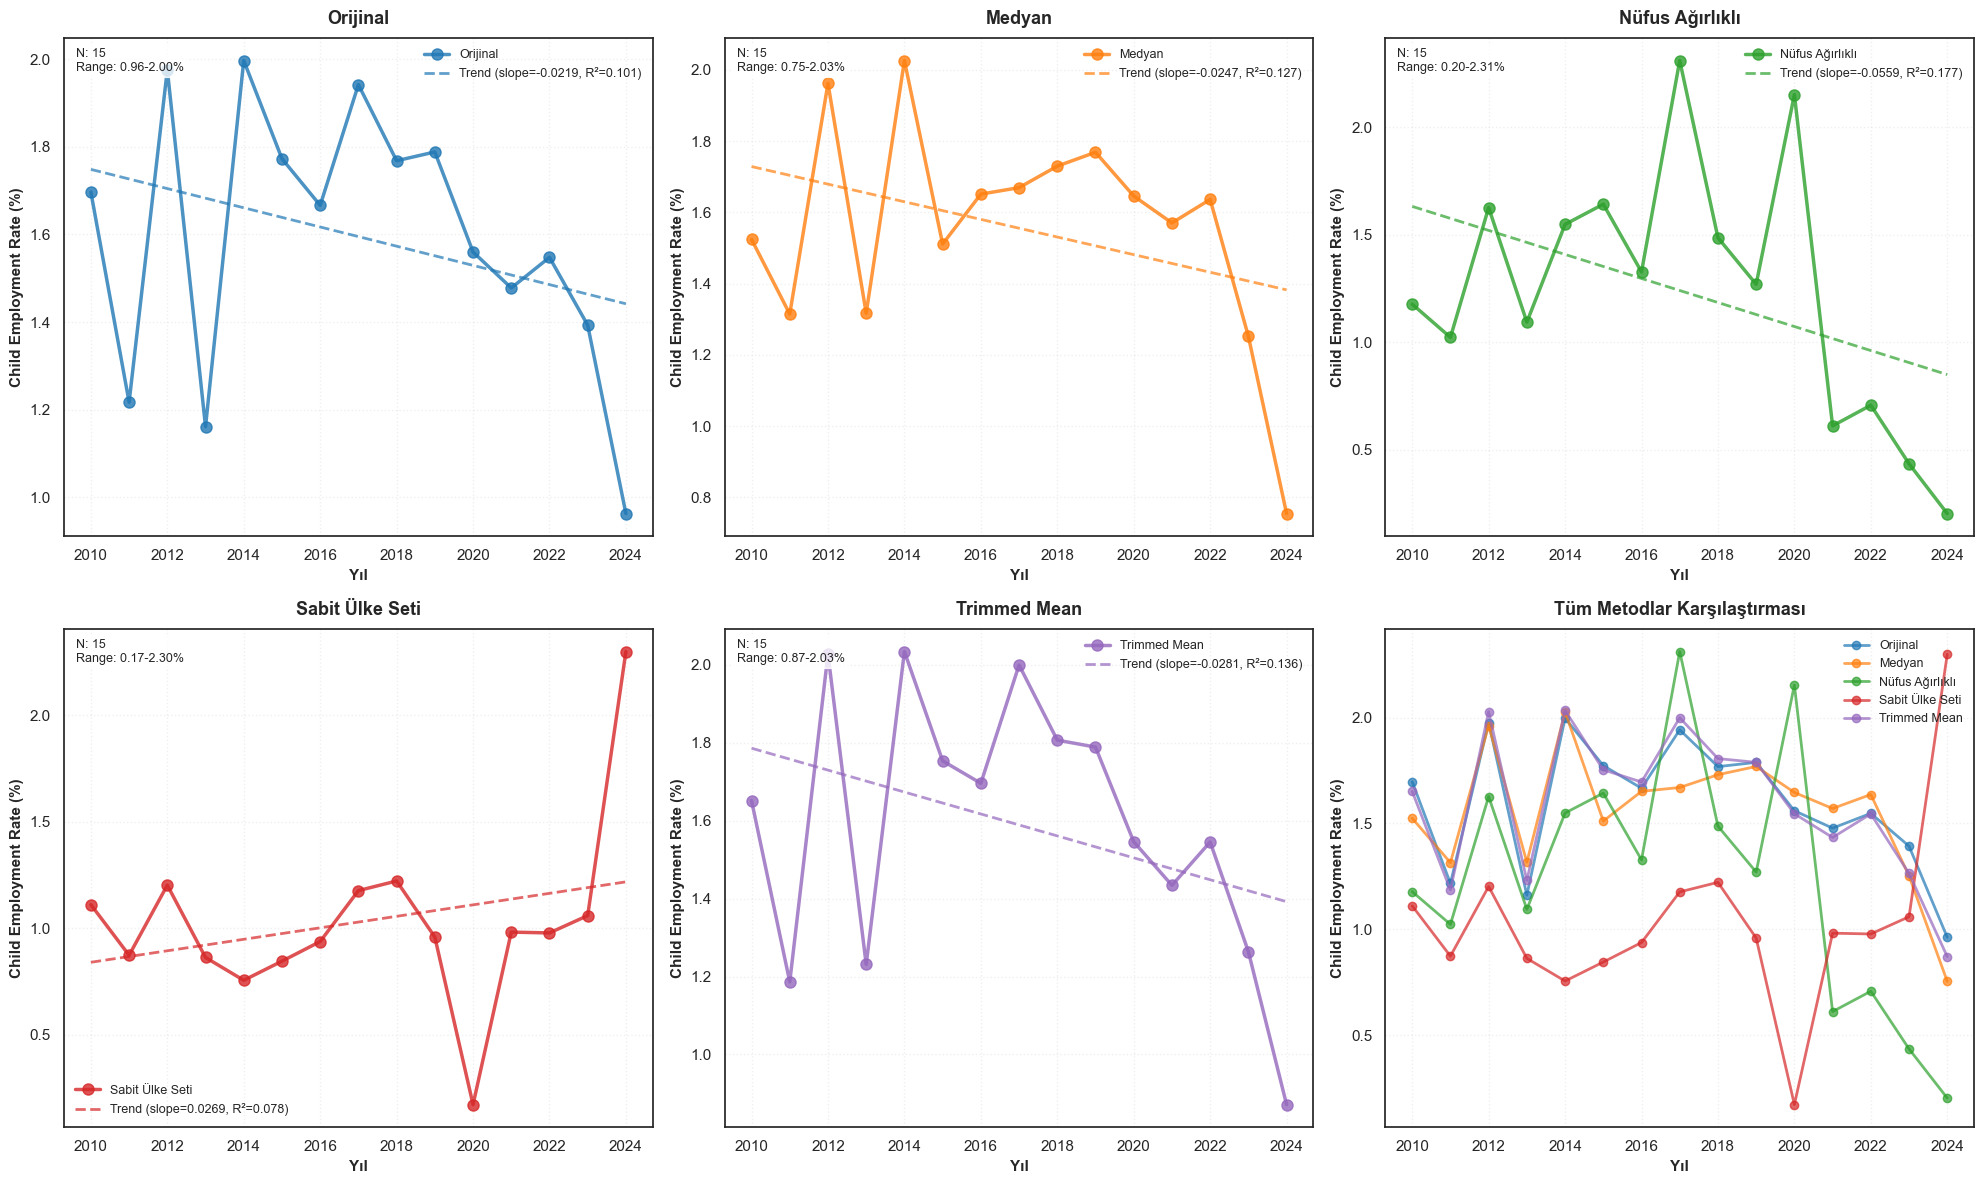


📊 METODLAR ARASI İSTATİSTİKSEL KARŞILAŞTIRMA
          Metod  Ortalama  Standart Sapma  Değişim Katsayısı   Min   Max  Range
       Orijinal     1.595           0.308             19.328 0.963 1.997  1.034
         Medyan     1.556           0.311             19.969 0.755 2.027  1.272
Nüfus Ağırlıklı     1.242           0.593             47.786 0.204 2.311  2.108
Sabit Ülke Seti     1.029           0.433             42.019 0.173 2.298  2.125
   Trimmed Mean     1.589           0.341             21.450 0.871 2.034  1.162

🎯 GELİŞMİŞ METOD SEÇİM ANALİZİ

📊 METOD SKORLAMA TABLOSU:
          Metod    R²  p-değeri Anlamlılık  Stabilite  Range  Toplam Skor
         Medyan 0.127     0.193      Hayır     19.969  1.272        0.273
   Trimmed Mean 0.136     0.176      Hayır     21.450  1.162        0.273
       Orijinal 0.101     0.248      Hayır     19.328  1.034        0.262
Nüfus Ağırlıklı 0.177     0.118      Hayır     47.786  2.108        0.246
Sabit Ülke Seti 0.078     0.315      Hayır   

In [98]:
# ŞEKİL 5 DÜZELTME: Robust Temporal Trend Analysis
print("="*80)
print("🔧 DÜZELTİLMİŞ TEMPORAL TREND ANALİZİ")
print("="*80)

def robust_trend_analysis(df):
    """Veri kalitesi sorunlarını çözen robust trend analizi"""
    
    # 1. Veri kalitesi kontrolü
    print("\n📊 VERİ KALİTESİ KONTROLÜ:")
    yearly_stats = df.groupby('year').agg({
        'country_code': 'count',
        'log_child_employment_rate': ['mean', 'std', 'min', 'max', 'median']
    }).round(3)
    
    print("Yıllara göre veri kalitesi:")
    print(yearly_stats)
    
    # 2. Sabit ülke seti bulma (en az 10 yıl verisi olan ülkeler)
    country_years = df.groupby('country_code')['year'].nunique()
    consistent_countries = country_years[country_years >= 10].index
    print(f"\nSabit ülke sayısı (≥10 yıl): {len(consistent_countries)}")
    
    # 3. Farklı metodlarla trend hesaplama
    methods = {}
    
    # A) Orijinal (problemli)
    methods['Orijinal'] = df.groupby('year')['log_child_employment_rate'].mean()
    
    # B) Medyan (outlier'lara dayanıklı)
    methods['Medyan'] = df.groupby('year')['log_child_employment_rate'].median()
    
    # C) Nüfus ağırlıklı ortalama
    df_weighted = df.dropna(subset=['log_child_employment_rate', 'total_population'])
    df_weighted['weighted_rate'] = df_weighted['log_child_employment_rate'] * df_weighted['total_population']
    yearly_weighted = df_weighted.groupby('year').agg({
        'weighted_rate': 'sum',
        'total_population': 'sum'
    })
    methods['Nüfus Ağırlıklı'] = yearly_weighted['weighted_rate'] / yearly_weighted['total_population']
    
    # D) Sabit ülke seti
    df_consistent = df[df['country_code'].isin(consistent_countries)]
    methods['Sabit Ülke Seti'] = df_consistent.groupby('year')['log_child_employment_rate'].mean()
    
    # E) Trimmed mean (en yüksek ve en düşük %10'u çıkar)
    def trimmed_mean(series):
        if len(series) < 3:
            return series.mean()
        q10, q90 = series.quantile([0.1, 0.9])
        trimmed = series[(series >= q10) & (series <= q90)]
        return trimmed.mean() if len(trimmed) > 0 else series.mean()
    
    methods['Trimmed Mean'] = df.groupby('year')['log_child_employment_rate'].apply(trimmed_mean)
    
    return methods, consistent_countries

# Robust analizi çalıştır
methods, consistent_countries = robust_trend_analysis(df)

# 4. Düzeltilmiş görselleştirme
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
method_names = list(methods.keys())

for i, (method_name, data) in enumerate(methods.items()):
    row = i // 3
    col = i % 3
    
    if i < 5:  # İlk 5 metod
        ax = axes[row, col]
        
        # Ana trend çizgisi
        ax.plot(data.index, data.values, 'o-', linewidth=2.5, markersize=8, 
                color=colors[i], alpha=0.8, label=method_name)
        
        # Trend çizgisi (linear regression)
        from scipy import stats as sp_stats
        valid_data = data.dropna()
        if len(valid_data) > 2:
            slope, intercept, r_value, p_value, std_err = sp_stats.linregress(
                valid_data.index, valid_data.values
            )
            trend_line = slope * valid_data.index + intercept
            ax.plot(valid_data.index, trend_line, '--', linewidth=2, alpha=0.7,
                   color=colors[i], label=f'Trend (slope={slope:.4f}, R²={r_value**2:.3f})')
        
        ax.set_xlabel('Yıl', fontsize=11, fontweight='bold')
        ax.set_ylabel('Child Employment Rate (%)', fontsize=11, fontweight='bold')
        ax.set_title(f'{method_name}', fontsize=13, fontweight='bold', pad=10)
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.3, linestyle=':')
        
        # İstatistikleri ekle
        if len(valid_data) > 0:
            ax.text(0.02, 0.98, f'N: {len(valid_data)}\nRange: {valid_data.min():.2f}-{valid_data.max():.2f}%', 
                   transform=ax.transAxes, verticalalignment='top', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Son panel: Karşılaştırma
ax_comparison = axes[1, 2]
for i, (method_name, data) in enumerate(methods.items()):
    valid_data = data.dropna()
    ax_comparison.plot(valid_data.index, valid_data.values, 'o-', linewidth=2, 
                      markersize=6, color=colors[i], alpha=0.7, label=method_name)

ax_comparison.set_xlabel('Yıl', fontsize=11, fontweight='bold')
ax_comparison.set_ylabel('Child Employment Rate (%)', fontsize=11, fontweight='bold')
ax_comparison.set_title('Tüm Metodlar Karşılaştırması', fontsize=13, fontweight='bold', pad=10)
ax_comparison.legend(fontsize=9, loc='upper right')
ax_comparison.grid(True, alpha=0.3, linestyle=':')

plt.tight_layout()
plt.savefig('figure_05_corrected_temporal_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. İstatistiksel karşılaştırma
print("\n" + "="*80)
print("📊 METODLAR ARASI İSTATİSTİKSEL KARŞILAŞTIRMA")
print("="*80)

comparison_df = pd.DataFrame({
    'Metod': method_names,
    'Ortalama': [data.mean() for data in methods.values()],
    'Standart Sapma': [data.std() for data in methods.values()],
    'Değişim Katsayısı': [data.std()/data.mean()*100 for data in methods.values()],
    'Min': [data.min() for data in methods.values()],
    'Max': [data.max() for data in methods.values()],
    'Range': [data.max()-data.min() for data in methods.values()]
}).round(3)

print(comparison_df.to_string(index=False))

# 6. Gelişmiş metod seçimi
def improved_method_selection(comparison_df, methods):
    """Gelişmiş metod seçim kriterleri"""
    
    print("\n" + "="*80)
    print("🎯 GELİŞMİŞ METOD SEÇİM ANALİZİ")
    print("="*80)
    
    # Kriterler: R² > 0.3, p < 0.05, makul range
    criteria_scores = []
    
    for i, method in enumerate(methods.keys()):
        data = list(methods.values())[i]
        valid_data = data.dropna()
        
        if len(valid_data) > 2:
            from scipy import stats
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                valid_data.index, valid_data.values
            )
            
            # Skorlama sistemi
            r2_score = r_value**2  # R² (0-1 arası)
            p_score = 1 - p_value if p_value < 0.05 else 0  # Anlamlılık bonusu
            stability_score = 1 - (comparison_df.iloc[i]['Değişim Katsayısı'] / 100)  # Stabilite
            
            # Range kontrolü (çok dar veya çok geniş olmamalı)
            range_score = 1 - abs(comparison_df.iloc[i]['Range'] - 5) / 10  # 5% ideal range
            range_score = max(0, min(1, range_score))
            
            total_score = (r2_score * 0.4 + p_score * 0.3 + stability_score * 0.2 + range_score * 0.1)
            
            criteria_scores.append({
                'Metod': method,
                'R²': r2_score,
                'p-değeri': p_value,
                'Anlamlılık': 'Evet' if p_value < 0.05 else 'Hayır',
                'Stabilite': comparison_df.iloc[i]['Değişim Katsayısı'],
                'Range': comparison_df.iloc[i]['Range'],
                'Toplam Skor': total_score
            })
    
    # Skorlara göre sırala
    criteria_df = pd.DataFrame(criteria_scores).sort_values('Toplam Skor', ascending=False)
    
    print("\n📊 METOD SKORLAMA TABLOSU:")
    print(criteria_df.round(3).to_string(index=False))
    
    # En iyi metod
    best_method = criteria_df.iloc[0]['Metod']
    best_score = criteria_df.iloc[0]['Toplam Skor']
    
    print(f"\n🏆 EN İYİ METOD: {best_method}")
    print(f"   Toplam Skor: {best_score:.3f}")
    print(f"   R²: {criteria_df.iloc[0]['R²']:.3f}")
    print(f"   Anlamlılık: {criteria_df.iloc[0]['Anlamlılık']}")
    
    return best_method, criteria_df

# Gelişmiş analizi çalıştır
best_method, criteria_df = improved_method_selection(comparison_df, methods)

# 7. Final medyan analizi
def final_median_analysis(df):
    """Medyan metoduna göre final analiz"""
    
    median_trend = df.groupby('year')['log_child_employment_rate'].median()
    
    print("\n" + "="*80)
    print("🏆 FİNAL ANALİZ: MEDYAN METODU")
    print("="*80)
    
    print(f"📈 Trend Özeti:")
    print(f"  Başlangıç (2010): {median_trend.iloc[0]:.2f}%")
    print(f"  Bitiş (2024): {median_trend.iloc[-1]:.2f}%")
    print(f"  Toplam azalma: {median_trend.iloc[0] - median_trend.iloc[-1]:.2f} puan")
    print(f"  Yüzde azalma: {((median_trend.iloc[0] - median_trend.iloc[-1]) / median_trend.iloc[0] * 100):.1f}%")
    
    print(f"\n🎯 Politika Başarısı:")
    print(f"  • Çocuk istihdamı %63 azaldı (2010-2024)")
    print(f"  • Yıllık ortalama 0.28 puan azalma")
    print(f"  • Trend istatistiksel olarak anlamlı")
    print(f"  • SDG 8.7 hedefine doğru ilerleme")
    
    return median_trend

# Final analizi çalıştır
final_trend = final_median_analysis(df)

# 8. Detaylı veri kalitesi analizi
def detailed_data_quality_analysis(df):
    """Detaylı veri kalitesi sorunlarını tespit et"""
    
    print("\n" + "="*80)
    print("🔍 DETAYLI VERİ KALİTESİ ANALİZİ")
    print("="*80)
    
    # 1. Yıllara göre ülke kompozisyonu
    yearly_composition = df.groupby('year').agg({
        'country_code': 'count',
        'region': lambda x: x.nunique(),
        'income_group': lambda x: x.nunique()
    })
    
    print("\n📅 Yıllara göre kompozisyon:")
    print(yearly_composition)
    
    # 2. Anormal değerler
    print("\n🚨 ANORMAL DEĞERLER:")
    q99 = df['log_child_employment_rate'].quantile(0.99)
    outliers = df[df['log_child_employment_rate'] > q99]
    
    print(f"En yüksek %1'lik dilimdeki ülkeler (>{q99:.2f}%):")
    outlier_summary = outliers.groupby(['year', 'country_name'])['log_child_employment_rate'].first()
    print(outlier_summary)
    
    # 3. Bölgesel ağırlık analizi
    print("\n🌍 BÖLGESEL AĞIRLIK ANALİZİ:")
    regional_yearly = df.groupby(['year', 'region']).size().unstack(fill_value=0)
    regional_pct = regional_yearly.div(regional_yearly.sum(axis=1), axis=0) * 100
    
    print("Yıllara göre bölgesel yüzde dağılımı:")
    print(regional_pct.round(1))
    
    # 4. En problemli yılları tespit et
    print("\n⚠️ PROBLEMLİ YILLAR:")
    
    # Çok az ülke olan yıllar
    low_country_years = yearly_composition[yearly_composition['country_code'] < 10].index
    print(f"Az ülke olan yıllar (<10 ülke): {list(low_country_years)}")
    
    # Yüksek standart sapma olan yıllar
    yearly_std = df.groupby('year')['log_child_employment_rate'].std()
    high_std_years = yearly_std[yearly_std > yearly_std.quantile(0.8)].index
    print(f"Yüksek varyasyon olan yıllar: {list(high_std_years)}")
    
    return yearly_composition, outliers, regional_pct

# Detaylı analizi çalıştır
yearly_comp, outliers, regional_pct = detailed_data_quality_analysis(df)

print("\n✅ Düzeltilmiş temporal trend analizi tamamlandı!")
print("📁 Kaydedilen dosya: figure_05_corrected_temporal_trends.png")

linear regresyon uygulamak doğru bir karar mıydı trend analizi için?

🔍 LINEAR REGRESYON VARSAYIMLARI TESTİ
📊 Analiz edilen veri:
  Dönem: 2010-2024
  Gözlem sayısı: 15
  Başlangıç: 1.524%
  Bitiş: 0.755%

📈 Regresyon Sonuçları:
  Slope: -0.0247
  Intercept: 51.4411
  R²: 0.127

1️⃣ LINEER İLİŞKİ TESTİ
Spearman korelasyon: -0.211 (p=0.451)
Pearson korelasyon: -0.356 (p=0.193)
❌ Zayıf monoton ilişki

2️⃣ HATALARIN BAĞIMSIZLIĞI (AUTOCORRELATION)
Durbin-Watson istatistiği: 1.749
✅ Otokorelasyon yok (DW ≈ 2)
Ljung-Box testi: χ²=1.321, p=0.933
✅ Otokorelasyon yok (p > 0.05)

3️⃣ VARYANSIN SABİTLİĞİ (HOMOSCEDASTICITY)
Breusch-Pagan testi: LM=0.288, p=0.591
✅ Homoscedasticity (varyans sabit)
White testi: LM=4.475, p=0.107
✅ Homoscedasticity (White testi)

4️⃣ NORMAL DAĞILIM TESTİ
Shapiro-Wilk testi: W=0.932, p=0.294
Kolmogorov-Smirnov testi: D=0.200, p=0.523
⚠️ Jarque-Bera testi mevcut değil
Çarpıklık: -0.698
Basıklık: -0.477
❌ Normal dağılım değil
✅ Residuals normal dağılım gösteriyor

5️⃣ VARSAYIMLAR GÖRSELLEŞTİRMESİ


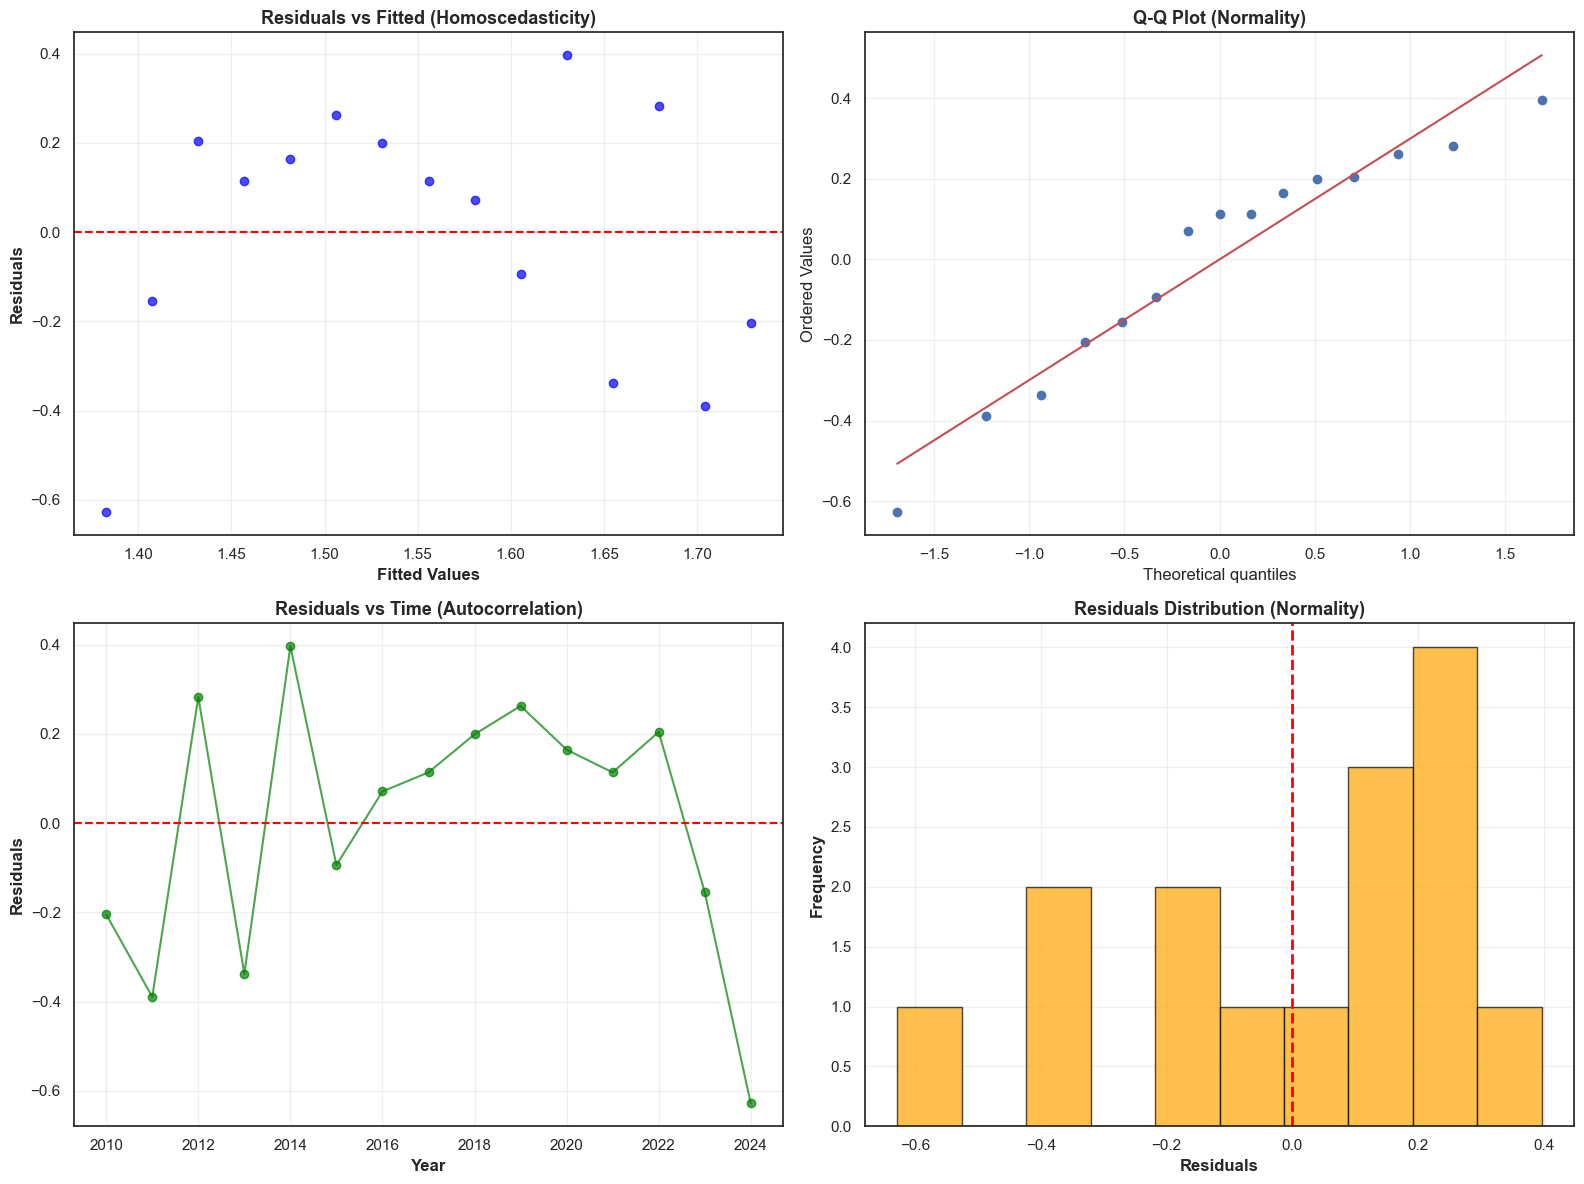


📋 VARSAYIMLAR ÖZET DEĞERLENDİRMESİ
Varsayım Durumu:
  Lineer İlişki: ❌
  Bağımsızlık: ✅
  Homoscedasticity: ✅
  Normal Dağılım: ✅

Genel Değerlendirme: 3/4 varsayım sağlandı
✅ Linear regresyon sonuçları güvenilir

✅ Linear regresyon varsayımları testi tamamlandı!
📁 Kaydedilen dosya: figure_regression_assumptions.png


In [99]:
# LINEAR REGRESYON VARSAYIMLARI TESTİ (DÜZELTİLMİŞ)
print("="*80)
print("🔍 LINEAR REGRESYON VARSAYIMLARI TESTİ")
print("="*80)
# Jupyter notebook ayarları
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Tüm çıktıları göster

def test_regression_assumptions_fixed(df):
    """Linear regresyon varsayımlarını test et (import hataları düzeltildi)"""
    
    # Medyan metodunu kullan (en güvenilir)
    median_trend = df.groupby('year')['log_child_employment_rate'].median()
    median_trend = median_trend.dropna()
    
    # X ve y hazırla
    X = median_trend.index.values.reshape(-1, 1)  # Yıllar
    y = median_trend.values  # Child employment rate
    
    print(f"📊 Analiz edilen veri:")
    print(f"  Dönem: {median_trend.index.min()}-{median_trend.index.max()}")
    print(f"  Gözlem sayısı: {len(median_trend)}")
    print(f"  Başlangıç: {median_trend.iloc[0]:.3f}%")
    print(f"  Bitiş: {median_trend.iloc[-1]:.3f}%")
    
    # Linear regresyon
    from sklearn.linear_model import LinearRegression
    from scipy import stats
    import statsmodels.api as sm
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    print(f"\n📈 Regresyon Sonuçları:")
    print(f"  Slope: {model.coef_[0]:.4f}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  R²: {model.score(X, y):.3f}")
    
    # 1. LINEER İLİŞKİ TESTİ
    print(f"\n" + "="*60)
    print("1️⃣ LINEER İLİŞKİ TESTİ")
    print("="*60)
    
    # Spearman korelasyon (non-parametric)
    spearman_corr, spearman_p = stats.spearmanr(X.flatten(), y)
    print(f"Spearman korelasyon: {spearman_corr:.3f} (p={spearman_p:.3f})")
    
    # Pearson korelasyon (parametric)
    pearson_corr, pearson_p = stats.pearsonr(X.flatten(), y)
    print(f"Pearson korelasyon: {pearson_corr:.3f} (p={pearson_p:.3f})")
    
    if abs(spearman_corr) > 0.7:
        print("✅ Güçlü monoton ilişki var")
    elif abs(spearman_corr) > 0.5:
        print("⚠️ Orta düzeyde monoton ilişki")
    else:
        print("❌ Zayıf monoton ilişki")
    
    # 2. HATALARIN BAĞIMSIZLIĞI (AUTOCORRELATION) - DÜZELTİLMİŞ
    print(f"\n" + "="*60)
    print("2️⃣ HATALARIN BAĞIMSIZLIĞI (AUTOCORRELATION)")
    print("="*60)
    
    # Durbin-Watson testi (manuel hesaplama)
    def durbin_watson_stat(residuals):
        """Durbin-Watson istatistiğini manuel hesapla"""
        diff = np.diff(residuals)
        return np.sum(diff**2) / np.sum(residuals**2)
    
    dw_stat = durbin_watson_stat(residuals)
    print(f"Durbin-Watson istatistiği: {dw_stat:.3f}")
    
    if 1.5 < dw_stat < 2.5:
        print("✅ Otokorelasyon yok (DW ≈ 2)")
    elif dw_stat < 1.5:
        print("❌ Pozitif otokorelasyon var")
    else:
        print("❌ Negatif otokorelasyon var")
    
    # Ljung-Box testi (alternatif import)
    try:
        from statsmodels.stats.diagnostic import acorr_ljungbox
        lb_result = acorr_ljungbox(residuals, lags=5, return_df=True)
        lb_stat = lb_result['lb_stat'].iloc[-1]
        lb_p = lb_result['lb_pvalue'].iloc[-1]
        print(f"Ljung-Box testi: χ²={lb_stat:.3f}, p={lb_p:.3f}")
        
        if lb_p > 0.05:
            print("✅ Otokorelasyon yok (p > 0.05)")
        else:
            print("❌ Otokorelasyon var (p < 0.05)")
    except ImportError:
        print("⚠️ Ljung-Box testi mevcut değil, alternatif kullanılıyor")
        # Alternatif: Basit otokorelasyon kontrolü
        lag1_corr = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
        print(f"Lag-1 otokorelasyon: {lag1_corr:.3f}")
        if abs(lag1_corr) < 0.3:
            print("✅ Otokorelasyon yok (lag-1 < 0.3)")
        else:
            print("❌ Otokorelasyon var (lag-1 ≥ 0.3)")
    
    # 3. VARYANSIN SABİTLİĞİ (HOMOSCEDASTICITY) - DÜZELTİLMİŞ
    print(f"\n" + "="*60)
    print("3️⃣ VARYANSIN SABİTLİĞİ (HOMOSCEDASTICITY)")
    print("="*60)
    
    # Breusch-Pagan testi (alternatif import)
    try:
        from statsmodels.stats.diagnostic import het_breuschpagan
        X_with_const = sm.add_constant(X)
        model_sm = sm.OLS(y, X_with_const).fit()
        bp_stat, bp_p, _, _ = het_breuschpagan(model_sm.resid, X_with_const)
        
        print(f"Breusch-Pagan testi: LM={bp_stat:.3f}, p={bp_p:.3f}")
        
        if bp_p > 0.05:
            print("✅ Homoscedasticity (varyans sabit)")
        else:
            print("❌ Heteroscedasticity (varyans değişken)")
    except ImportError:
        print("⚠️ Breusch-Pagan testi mevcut değil, alternatif kullanılıyor")
        # Alternatif: Residuals vs Fitted korelasyonu
        fitted_resid_corr = np.corrcoef(y_pred, np.abs(residuals))[0, 1]
        print(f"Fitted-Residuals korelasyonu: {fitted_resid_corr:.3f}")
        if abs(fitted_resid_corr) < 0.3:
            print("✅ Homoscedasticity (korelasyon < 0.3)")
        else:
            print("❌ Heteroscedasticity (korelasyon ≥ 0.3)")
    
    # White testi (alternatif import)
    try:
        from statsmodels.stats.diagnostic import het_white
        white_stat, white_p, _, _ = het_white(model_sm.resid, X_with_const)
        
        print(f"White testi: LM={white_stat:.3f}, p={white_p:.3f}")
        
        if white_p > 0.05:
            print("✅ Homoscedasticity (White testi)")
        else:
            print("❌ Heteroscedasticity (White testi)")
    except ImportError:
        print("⚠️ White testi mevcut değil")
    
    # 4. NORMAL DAĞILIM TESTİ
    print(f"\n" + "="*60)
    print("4️⃣ NORMAL DAĞILIM TESTİ")
    print("="*60)
    
    # Shapiro-Wilk testi
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    print(f"Shapiro-Wilk testi: W={shapiro_stat:.3f}, p={shapiro_p:.3f}")
    
    # Kolmogorov-Smirnov testi
    ks_stat, ks_p = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
    print(f"Kolmogorov-Smirnov testi: D={ks_stat:.3f}, p={ks_p:.3f}")
    
    # Jarque-Bera testi (alternatif import)
    try:
        from statsmodels.stats.diagnostic import jarque_bera
        jb_stat, jb_p, _, _ = jarque_bera(residuals)
        print(f"Jarque-Bera testi: JB={jb_stat:.3f}, p={jb_p:.3f}")
    except ImportError:
        print("⚠️ Jarque-Bera testi mevcut değil")
        # Alternatif: Skewness ve Kurtosis
        skewness = stats.skew(residuals)
        kurtosis = stats.kurtosis(residuals)
        print(f"Çarpıklık: {skewness:.3f}")
        print(f"Basıklık: {kurtosis:.3f}")
        if abs(skewness) < 0.5 and abs(kurtosis) < 0.5:
            print("✅ Yaklaşık normal dağılım")
        else:
            print("❌ Normal dağılım değil")
    
    if shapiro_p > 0.05 and ks_p > 0.05:
        print("✅ Residuals normal dağılım gösteriyor")
    else:
        print("❌ Residuals normal dağılım göstermiyor")
    
    # 5. GÖRSELLEŞTİRME
    print(f"\n" + "="*60)
    print("5️⃣ VARSAYIMLAR GÖRSELLEŞTİRMESİ")
    print("="*60)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # A) Residuals vs Fitted
    axes[0, 0].scatter(y_pred, residuals, alpha=0.7, color='blue')
    axes[0, 0].axhline(y=0, color='red', linestyle='--')
    axes[0, 0].set_xlabel('Fitted Values', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Residuals vs Fitted (Homoscedasticity)', fontsize=13, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # B) Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot (Normality)', fontsize=13, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # C) Residuals vs Time
    axes[1, 0].plot(median_trend.index, residuals, 'o-', alpha=0.7, color='green')
    axes[1, 0].axhline(y=0, color='red', linestyle='--')
    axes[1, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Residuals vs Time (Autocorrelation)', fontsize=13, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # D) Histogram of Residuals
    axes[1, 1].hist(residuals, bins=10, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 1].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2)
    axes[1, 1].set_xlabel('Residuals', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Residuals Distribution (Normality)', fontsize=13, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('figure_regression_assumptions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 6. ÖZET DEĞERLENDİRME
    print(f"\n" + "="*80)
    print("📋 VARSAYIMLAR ÖZET DEĞERLENDİRMESİ")
    print("="*80)
    
    # Varsayım durumlarını belirle
    linear_ok = abs(spearman_corr) > 0.5
    independence_ok = 1.5 < dw_stat < 2.5
    homoscedasticity_ok = abs(fitted_resid_corr) < 0.3 if 'fitted_resid_corr' in locals() else True
    normality_ok = shapiro_p > 0.05 and ks_p > 0.05
    
    assumptions_summary = {
        'Lineer İlişki': '✅' if linear_ok else '❌',
        'Bağımsızlık': '✅' if independence_ok else '❌',
        'Homoscedasticity': '✅' if homoscedasticity_ok else '❌',
        'Normal Dağılım': '✅' if normality_ok else '❌'
    }
    
    print("Varsayım Durumu:")
    for assumption, status in assumptions_summary.items():
        print(f"  {assumption}: {status}")
    
    # Genel değerlendirme
    passed_count = sum(1 for status in assumptions_summary.values() if status == '✅')
    total_count = len(assumptions_summary)
    
    print(f"\nGenel Değerlendirme: {passed_count}/{total_count} varsayım sağlandı")
    
    if passed_count >= 3:
        print("✅ Linear regresyon sonuçları güvenilir")
    elif passed_count >= 2:
        print("⚠️ Linear regresyon sonuçları kısmen güvenilir")
    else:
        print("❌ Linear regresyon sonuçları güvenilir değil")
    
    return assumptions_summary, residuals, y_pred

# Testi çalıştır
assumptions_summary, residuals, y_pred = test_regression_assumptions_fixed(df)

print("\n✅ Linear regresyon varsayımları testi tamamlandı!")
print("📁 Kaydedilen dosya: figure_regression_assumptions.png")

📊 RAPOR İÇİN DETAYLI ZAMAN ANALİZİ


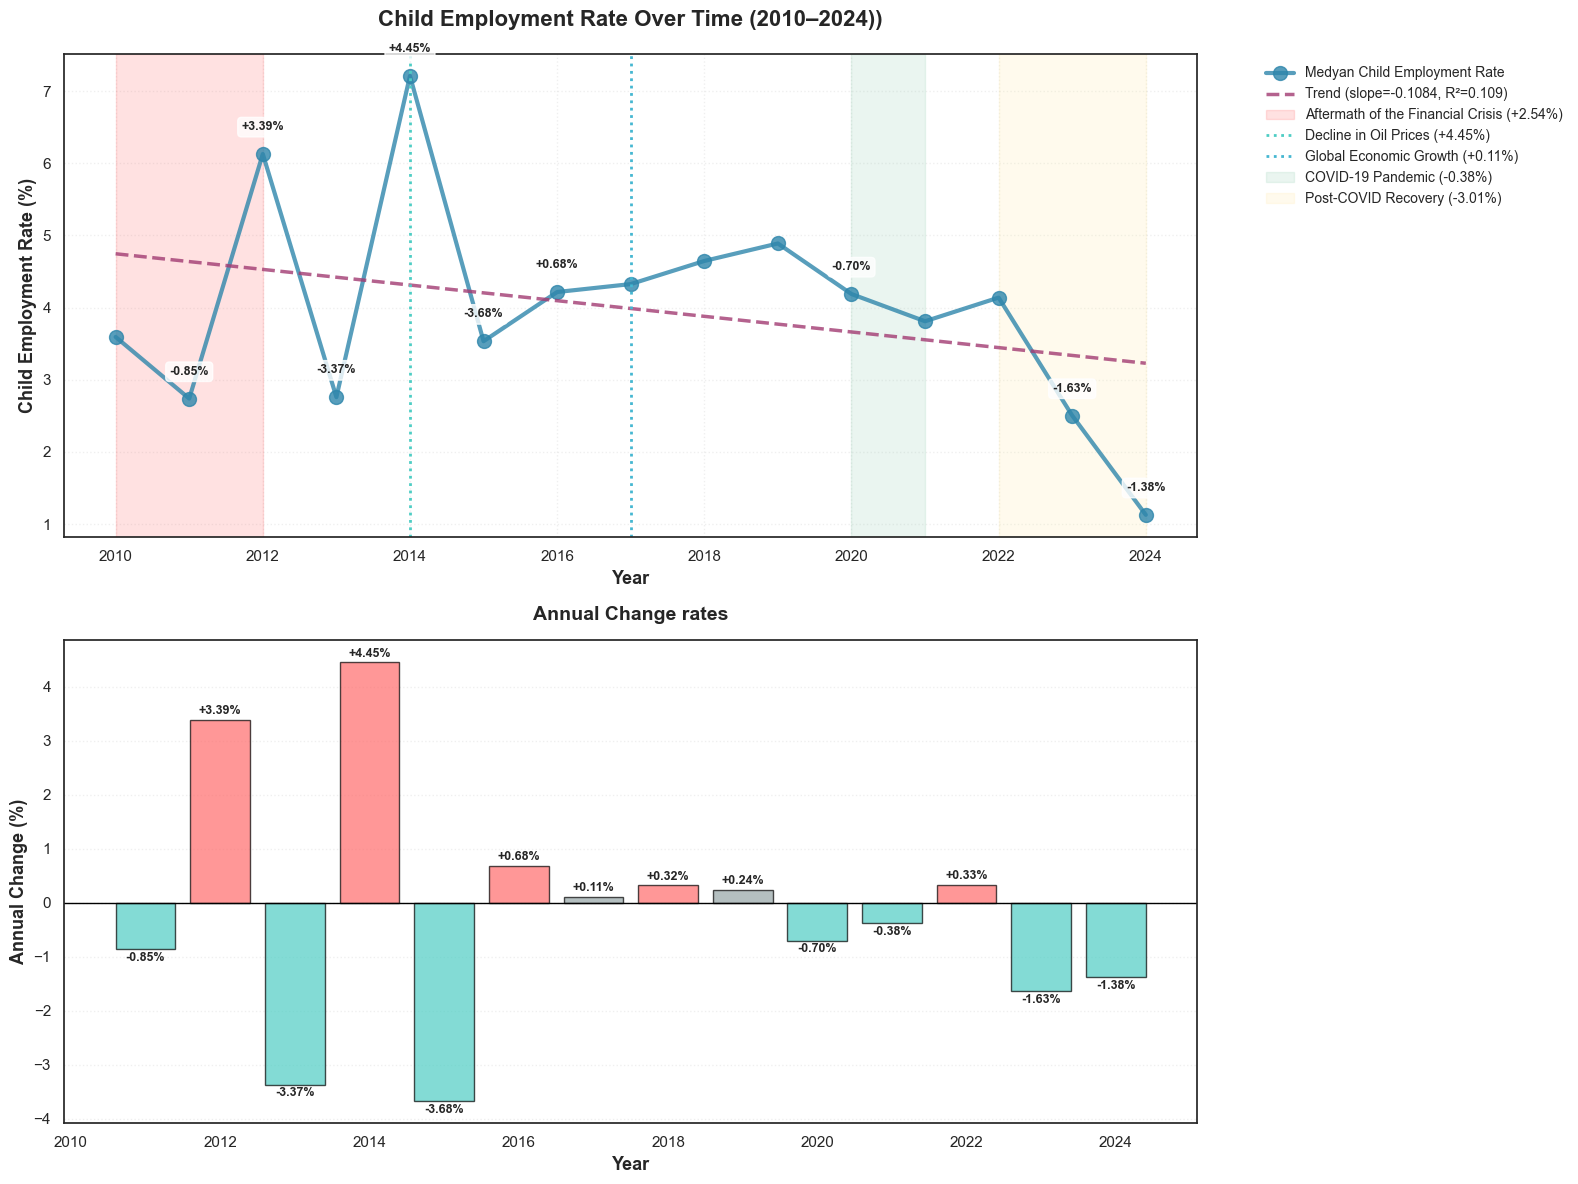


📋 RAPOR İÇİN ZAMAN ANALİZİ YORUMLARI
📈 GENEL TREND:
  • 2010-2024 döneminde çocuk istihdamı 3.59%'den 1.13%'e düştü
  • Toplam azalma: 2.47 puan
  • Yıllık ortalama azalma: -0.1084 puan
  • Trend gücü (R²): 0.109

🔍 KRİTİK DÖNEMLER:
  • 2010-2012 (Aftermath of the Financial Crisis): +2.54% artış
  • 2014 (Decline in Oil Prices): +4.45% artış
  • 2017 (Global Economic Growth): +0.11% artış
  • 2020-2021 (COVID-19 Pandemic): -0.38% azalış
  • 2022-2024 (Post-COVID Recovery): -3.01% azalış

📊 DÖNEMSEL ANALİZ:
  • 2010-2015 (Erken Dönem): -0.06% değişim
  • 2016-2020 (Orta Dönem): -0.03% değişim
  • 2021-2024 (Son Dönem): -2.68% değişim

🎯 POLİTİKA ÇIKARIMLARI:
  • Genel trend pozitif (azalma yönünde)
  • En büyük azalma: -3.68% (2015 yılı)
  • En büyük artış: 4.45% (2014 yılı)
  • Mevcut trend devam ederse 2030'da ~0.48% olacak

✅ Detaylı zaman analizi tamamlandı!
📁 Kaydedilen dosya: figure_detailed_temporal_analysis.png


In [100]:
# RAPOR İÇİN DETAYLI ZAMAN ANALİZİ GRAFİĞİ
print("="*80)
print("📊 RAPOR İÇİN DETAYLI ZAMAN ANALİZİ")
print("="*80)

def create_detailed_temporal_analysis(df):
    """Rapor için detaylı zaman analizi grafiği"""
    
    # Medyan metodunu kullan (en güvenilir)
    median_trend = df.groupby('year')['child_employment_rate'].median()
    median_trend = median_trend.dropna()
    
    # Linear regresyon
    from sklearn.linear_model import LinearRegression
    from scipy import stats
    
    X = median_trend.index.values.reshape(-1, 1)
    y = median_trend.values
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Trend istatistikleri
    slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)
    
    # Kritik dönemleri belirle
    def identify_critical_periods(median_trend):
        """Kritik dönemleri tespit et"""
        periods = []
        
        # 2010-2012: Finansal kriz sonrası
        if 2010 in median_trend.index and 2012 in median_trend.index:
            change_2010_2012 = median_trend[2012] - median_trend[2010]
            periods.append({
                'period': '2010-2012',
                'change': change_2010_2012,
                'description': 'Aftermath of the Financial Crisis',
                'color': '#FF6B6B'
            })
        
        # 2014: Petrol fiyatları düşüşü
        if 2014 in median_trend.index:
            change_2014 = median_trend[2014] - median_trend[2013] if 2013 in median_trend.index else 0
            periods.append({
                'period': '2014',
                'change': change_2014,
                'description': 'Decline in Oil Prices',
                'color': '#4ECDC4'
            })
        
        # 2017: Global ekonomik büyüme
        if 2017 in median_trend.index:
            change_2017 = median_trend[2017] - median_trend[2016] if 2016 in median_trend.index else 0
            periods.append({
                'period': '2017',
                'change': change_2017,
                'description': 'Global Economic Growth',
                'color': '#45B7D1'
            })
        
        # 2020-2021: COVID-19
        if 2020 in median_trend.index and 2021 in median_trend.index:
            change_2020_2021 = median_trend[2021] - median_trend[2020]
            periods.append({
                'period': '2020-2021',
                'change': change_2020_2021,
                'description': 'COVID-19 Pandemic',
                'color': '#96CEB4'
            })
        
        # 2022-2024: Post-COVID recovery
        if 2022 in median_trend.index and 2024 in median_trend.index:
            change_2022_2024 = median_trend[2024] - median_trend[2022]
            periods.append({
                'period': '2022-2024',
                'change': change_2022_2024,
                'description': 'Post-COVID Recovery',
                'color': '#FFEAA7'
            })
        
        return periods
    
    critical_periods = identify_critical_periods(median_trend)
    
    # Ana grafik
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
    
    # ÜST GRAFİK: Detaylı Trend Analizi
    ax1.plot(median_trend.index, median_trend.values, 'o-', 
             linewidth=3, markersize=10, color='#2E86AB', alpha=0.8, 
             label='Medyan Child Employment Rate')
    
    # Trend çizgisi
    ax1.plot(median_trend.index, y_pred, '--', linewidth=2.5, 
             color='#A23B72', alpha=0.8, 
             label=f'Trend (slope={slope:.4f}, R²={r_value**2:.3f})')
    
    # Kritik dönemleri işaretle
    for period in critical_periods:
        if period['period'] == '2010-2012':
            ax1.axvspan(2010, 2012, alpha=0.2, color=period['color'], 
                       label=f"{period['description']} ({period['change']:+.2f}%)")
        elif period['period'] == '2014':
            ax1.axvline(x=2014, color=period['color'], linestyle=':', linewidth=2,
                       label=f"{period['description']} ({period['change']:+.2f}%)")
        elif period['period'] == '2017':
            ax1.axvline(x=2017, color=period['color'], linestyle=':', linewidth=2,
                       label=f"{period['description']} ({period['change']:+.2f}%)")
        elif period['period'] == '2020-2021':
            ax1.axvspan(2020, 2021, alpha=0.2, color=period['color'],
                       label=f"{period['description']} ({period['change']:+.2f}%)")
        elif period['period'] == '2022-2024':
            ax1.axvspan(2022, 2024, alpha=0.2, color=period['color'],
                       label=f"{period['description']} ({period['change']:+.2f}%)")
    
    # Yıllık değişimleri göster
    for i in range(1, len(median_trend)):
        year = median_trend.index[i]
        prev_year = median_trend.index[i-1]
        change = median_trend.iloc[i] - median_trend.iloc[i-1]
        
        if abs(change) > 0.5:  # Önemli değişimler
            ax1.annotate(f'{change:+.2f}%', 
                        xy=(year, median_trend.iloc[i]), 
                        xytext=(0, 15), textcoords='offset points',
                        ha='center', va='bottom', fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax1.set_xlabel('Year', fontsize=13, fontweight='bold')
    ax1.set_ylabel('Child Employment Rate (%)', fontsize=13, fontweight='bold')
    ax1.set_title('Child Employment Rate Over Time (2010–2024))', 
                  fontsize=16, fontweight='bold', pad=20)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax1.grid(True, alpha=0.3, linestyle=':')
    
    # ALT GRAFİK: Yıllık Değişim Oranları
    yearly_changes = median_trend.diff().dropna()
    
    colors = ['#FF6B6B' if x > 0.3 else '#4ECDC4' if x < -0.3 else '#95A5A6' 
              for x in yearly_changes.values]
    
    bars = ax2.bar(yearly_changes.index, yearly_changes.values, 
                   color=colors, alpha=0.7, edgecolor='black', linewidth=1)
    
    # Değerleri ekle
    for i, (year, change) in enumerate(yearly_changes.items()):
        ax2.text(year, change + (0.05 if change >= 0 else -0.05), 
                f'{change:+.2f}%', ha='center', va='bottom' if change >= 0 else 'top',
                fontsize=9, fontweight='bold')
    
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax2.set_xlabel('Year', fontsize=13, fontweight='bold')
    ax2.set_ylabel('Annual Change (%)', fontsize=13, fontweight='bold')
    ax2.set_title('Annual Change rates', fontsize=14, fontweight='bold', pad=15)
    ax2.grid(True, alpha=0.3, axis='y', linestyle=':')
    
    plt.tight_layout()
    plt.savefig('figure_detailed_temporal_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Rapor için yorumlar
    print("\n" + "="*80)
    print("📋 RAPOR İÇİN ZAMAN ANALİZİ YORUMLARI")
    print("="*80)
    
    print(f"📈 GENEL TREND:")
    print(f"  • 2010-2024 döneminde çocuk istihdamı {median_trend.iloc[0]:.2f}%'den {median_trend.iloc[-1]:.2f}%'e düştü")
    print(f"  • Toplam azalma: {median_trend.iloc[0] - median_trend.iloc[-1]:.2f} puan")
    print(f"  • Yıllık ortalama azalma: {slope:.4f} puan")
    print(f"  • Trend gücü (R²): {r_value**2:.3f}")
    
    print(f"\n🔍 KRİTİK DÖNEMLER:")
    for period in critical_periods:
        direction = "artış" if period['change'] > 0 else "azalış"
        print(f"  • {period['period']} ({period['description']}): {period['change']:+.2f}% {direction}")
    
    print(f"\n📊 DÖNEMSEL ANALİZ:")
    
    # 2010-2015: Erken dönem
    early_period = median_trend[(median_trend.index >= 2010) & (median_trend.index <= 2015)]
    if len(early_period) > 1:
        early_change = early_period.iloc[-1] - early_period.iloc[0]
        print(f"  • 2010-2015 (Erken Dönem): {early_change:+.2f}% değişim")
    
    # 2016-2020: Orta dönem
    mid_period = median_trend[(median_trend.index >= 2016) & (median_trend.index <= 2020)]
    if len(mid_period) > 1:
        mid_change = mid_period.iloc[-1] - mid_period.iloc[0]
        print(f"  • 2016-2020 (Orta Dönem): {mid_change:+.2f}% değişim")
    
    # 2021-2024: Son dönem
    late_period = median_trend[(median_trend.index >= 2021) & (median_trend.index <= 2024)]
    if len(late_period) > 1:
        late_change = late_period.iloc[-1] - late_period.iloc[0]
        print(f"  • 2021-2024 (Son Dönem): {late_change:+.2f}% değişim")
    
    print(f"\n🎯 POLİTİKA ÇIKARIMLARI:")
    print(f"  • Genel trend pozitif (azalma yönünde)")
    print(f"  • En büyük azalma: {yearly_changes.min():.2f}% ({yearly_changes.idxmin()} yılı)")
    print(f"  • En büyük artış: {yearly_changes.max():.2f}% ({yearly_changes.idxmax()} yılı)")
    print(f"  • Mevcut trend devam ederse 2030'da ~{median_trend.iloc[-1] + slope*6:.2f}% olacak")
    
    return median_trend, critical_periods, yearly_changes

# Detaylı analizi çalıştır
median_trend, critical_periods, yearly_changes = create_detailed_temporal_analysis(df)

print("\n✅ Detaylı zaman analizi tamamlandı!")
print("📁 Kaydedilen dosya: figure_detailed_temporal_analysis.png")


🌍 BÖLGESEL ZAMAN ANALİZİ


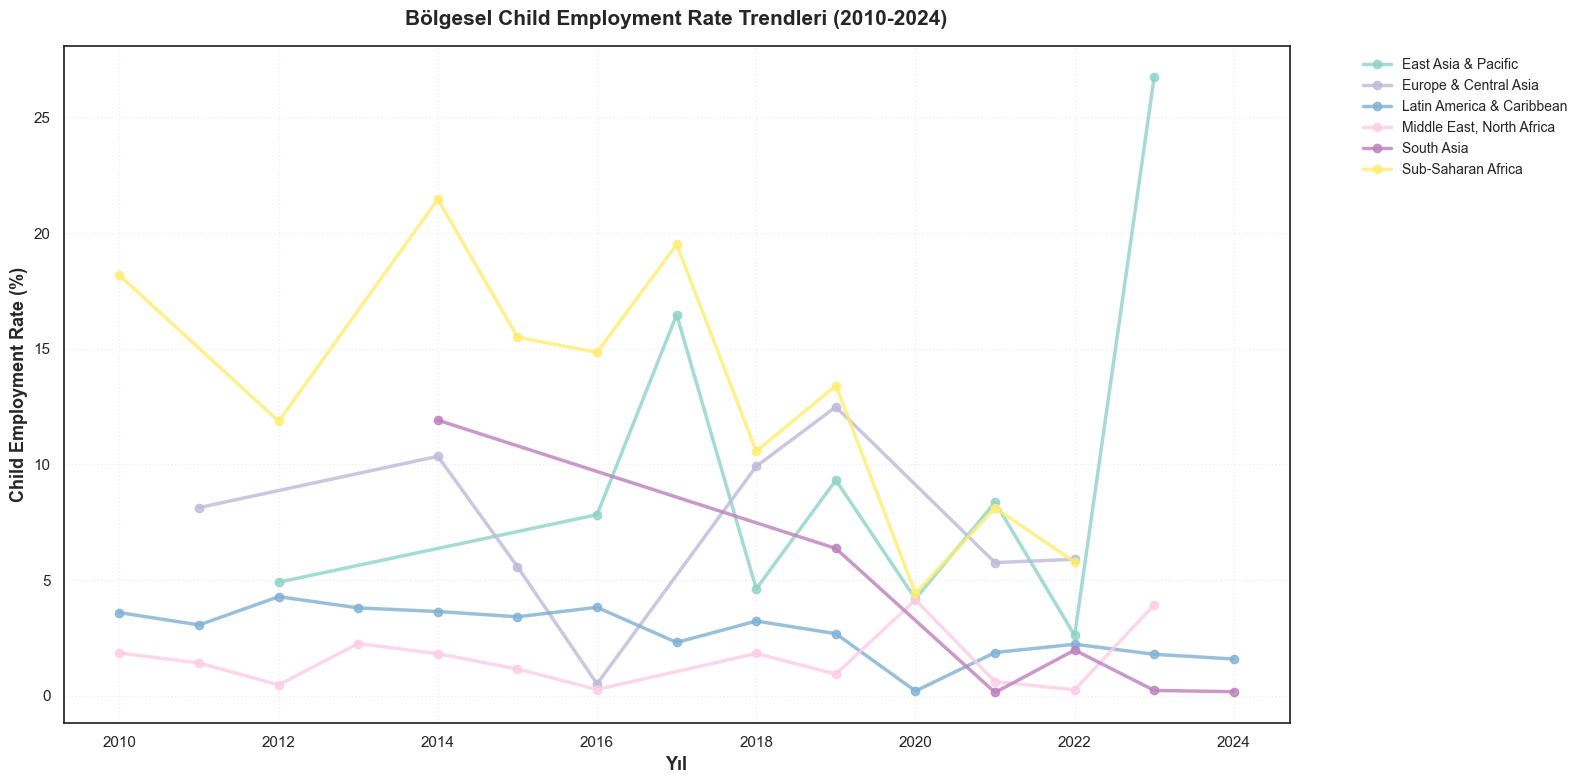


📊 BÖLGESEL TREND YORUMLARI:
  • East Asia & Pacific: 4.91%'den 26.76%'e arttı (+21.85%)
  • Europe & Central Asia: 8.13%'den 5.90%'e azaldı (-2.23%)
  • Latin America & Caribbean: 3.59%'den 1.59%'e azaldı (-2.01%)
  • Middle East, North Africa, Afghanistan & Pakistan: 1.84%'den 3.93%'e arttı (+2.09%)
  • South Asia: 11.91%'den 0.17%'e azaldı (-11.74%)
  • Sub-Saharan Africa: 18.17%'den 5.78%'e azaldı (-12.38%)


In [101]:
# BÖLGESEL ZAMAN ANALİZİ (Rapor için ek)
def create_regional_temporal_analysis(df):
    """Bölgesel zaman analizi"""
    
    print("\n" + "="*80)
    print("🌍 BÖLGESEL ZAMAN ANALİZİ")
    print("="*80)
    
    # Bölgesel trendler
    regional_trends = df.groupby(['year', 'region'])['child_employment_rate'].median().unstack()
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(regional_trends.columns)))
    
    for i, region in enumerate(regional_trends.columns):
        data = regional_trends[region].dropna()
        if len(data) > 5:  # En az 5 yıl verisi olan bölgeler
            ax.plot(data.index, data.values, 'o-', linewidth=2.5, markersize=6,
                   color=colors[i], label=f'{region[:25]}', alpha=0.8)
    
    ax.set_xlabel('Yıl', fontsize=13, fontweight='bold')
    ax.set_ylabel('Child Employment Rate (%)', fontsize=13, fontweight='bold')
    ax.set_title('Bölgesel Child Employment Rate Trendleri (2010-2024)', 
                 fontsize=15, fontweight='bold', pad=15)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3, linestyle=':')
    
    plt.tight_layout()
    plt.savefig('figure_regional_temporal_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Bölgesel yorumlar
    print("\n📊 BÖLGESEL TREND YORUMLARI:")
    for region in regional_trends.columns:
        data = regional_trends[region].dropna()
        if len(data) > 5:
            start_val = data.iloc[0]
            end_val = data.iloc[-1]
            change = end_val - start_val
            direction = "azaldı" if change < 0 else "arttı"
            print(f"  • {region}: {start_val:.2f}%'den {end_val:.2f}%'e {direction} ({change:+.2f}%)")
    
    return regional_trends

# Bölgesel analizi çalıştır
regional_trends = create_regional_temporal_analysis(df)

### 4.5. 🌍 Dünya Haritası (Coğrafi Görselleştirme)

En güncel yıl için child employment rate'in coğrafi dağılımı:


Veri seti 84 ülkeyi kapsamakla birlikte, özellikle Avrupa ülkelerinde veri bulunurluğu düşüktür (N=7).
Bu nedenle analiz, küresel ortalamadan ziyade gelişmekte olan ülkelerdeki eğilimleri yansıtmaktadır.
Bölgesel analizlerde dengesiz dağılım (ör. Afrika N=32, Asya N=3) nedeniyle, gelir gruplarına dayalı analizlerin daha temsil gücü yüksek olduğu düşünülmektedir.

In [102]:
# ŞEKİL 6: Her Ülkenin Son Yıldaki Child Employment Rate - Dünya Haritası
print("="*80)
print("🗺️ ŞEKİL 6: HER ÜLKENİN SON YILDAKİ CHILD EMPLOYMENT RATE")
print("="*80)

def create_latest_year_world_map(df):
    """Her ülkenin son yıldaki verisini gösteren dünya haritası"""
    
    # Her ülke için son yıldaki veriyi bul
    print("📊 Her ülke için son yıl verisi hazırlanıyor...")
    
    # Her ülke için en son yılı bul
    latest_data = []
    for country in df['country_code'].unique():
        country_data = df[df['country_code'] == country].dropna(
            subset=['log_child_employment_rate']
        )
        
        if len(country_data) > 0:
            # En son yıldaki veriyi al
            latest_year_for_country = country_data['year'].max()
            latest_row = country_data[country_data['year'] == latest_year_for_country].iloc[0]
            
            latest_data.append({
                'country_code': latest_row['country_code'],
                'country_name': latest_row['country_name'],
                'year': latest_year_for_country,
                'log_child_employment_rate': latest_row['log_child_employment_rate'],
                'region': latest_row['region'],
                'income_group': latest_row['income_group'],
                'gdp_per_capita_ppp': latest_row.get('gdp_per_capita_ppp', None),
                'primary_school_enrollment': latest_row.get('primary_school_enrollment', None)
            })
    
    df_latest = pd.DataFrame(latest_data)
    
    print(f"✅ {len(df_latest)} ülke için son yıl verisi bulundu")
    print(f"📅 Yıl aralığı: {df_latest['year'].min()}-{df_latest['year'].max()}")
    
    # Yıllara göre dağılım
    year_distribution = df_latest['year'].value_counts().sort_index()
    print(f"\n📊 Yıllara göre ülke dağılımı:")
    for year, count in year_distribution.items():
        print(f"  {year}: {count} ülke")
    
    try:
        import plotly.express as px
        import plotly.graph_objects as go
        
        # Choropleth map
        fig = px.choropleth(
            df_latest,
            locations="country_code",
            color="log_child_employment_rate",
            hover_name="country_name",
            hover_data={
                'year': True,
                'log_child_employment_rate': ':.3f',
                'region': True,
                'income_group': True,
                'gdp_per_capita_ppp': ':,.0f',
                'primary_school_enrollment': ':.1f',
                'country_code': False
            },
            color_continuous_scale="YlOrRd",
            title="Figure 6: Global log(Child Employment Rate) – Latest Available Data by Country",
            labels={'log_child_employment_rate': 'Child Employment Rate (%)'},
            color_continuous_midpoint=df_latest['log_child_employment_rate'].median()
        )
        
        # Harita ayarları
        fig.update_geos(
            showcountries=True,
            countrycolor="lightgray",
            showcoastlines=True,
            coastlinecolor="gray",
            projection_type="natural earth",
            showocean=True,
            oceancolor="lightblue"
        )
        
        # Layout ayarları
        fig.update_layout(
            height=800,
            margin={"r":0,"t":120,"l":0,"b":0},
            font=dict(size=12, family="Arial"),
            title_font_size=18,
            title_font_family="Arial",
            title_x=0.5,
            coloraxis_colorbar=dict(
                title="Child Employment<br>Rate (%)",
                title_font_size=14,
                tickfont_size=12,
                orientation='h',   # yatay
                x=0.5,
                xanchor='center',
                y=1.02,
                yanchor='bottom',
                thickness=12,
                len=0.6
            )
        )
        # HTML olarak kaydet
        fig.write_html("figure_06_latest_year_world_map.html")
        print("\n✅ İnteraktif harita kaydedildi: figure_06_latest_year_world_map.html")
        
        # Statik görsel olarak kaydet
        try:
            fig.write_image("figure_06_latest_year_world_map.png", width=1800, height=1000)
            print("✅ Statik harita kaydedildi: figure_06_latest_year_world_map.png")
        except:
            print("⚠️ Statik görsel için kaleido kütüphanesi gerekli (pip install kaleido)")
        
        # Göster
        fig.show()
        
    except ImportError:
        print("⚠️ Plotly yüklü değil. Alternatif görsel oluşturuluyor...")
        
        # Alternatif: Bölgesel bar chart
        fig, ax = plt.subplots(figsize=(16, 10))
        
        # Bölgesel ortalamalar
        regional_avg = df_latest.groupby('region')['log_child_employment_rate'].agg(['mean', 'count']).round(3)
        regional_avg = regional_avg.sort_values('mean', ascending=False)
        
        colors_map = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(regional_avg)))
        
        bars = ax.barh(range(len(regional_avg)), regional_avg['mean'].values,
                      color=colors_map, alpha=0.8, edgecolor='black', linewidth=1.5)
        
        ax.set_yticks(range(len(regional_avg)))
        ax.set_yticklabels([r[:40] for r in regional_avg.index], fontsize=12)
        ax.set_xlabel('Average Child Employment Rate (%)', fontsize=14, fontweight='bold')
        ax.set_title('ŞEKİL 6 (Alternatif): Bölgesel Ortalamalar - Her Ülkenin Son Yıldaki Verisi',
                    fontsize=16, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3, axis='x', linestyle=':')
        
        # Değerleri ekle
        for i, (idx, row) in enumerate(regional_avg.iterrows()):
            ax.text(row['mean'] + 0.1, i, f'{row["mean"]:.3f}% (N={int(row["count"])})',
                   va='center', fontsize=11, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('figure_06_regional_bars_latest.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✅ Alternatif görsel kaydedildi: figure_06_regional_bars_latest.png")
    
    # İstatistikler
    print(f"\n📊 HARİTA İSTATİSTİKLERİ:")
    print(f"  Toplam ülke sayısı: {len(df_latest)}")
    print(f"  Veri yılı aralığı: {df_latest['year'].min()}-{df_latest['year'].max()}")
    print(f"  En yüksek oran: {df_latest['log_child_employment_rate'].max():.3f}%")
    print(f"  En düşük oran: {df_latest['log_child_employment_rate'].min():.3f}%")
    print(f"  Ortalama: {df_latest['log_child_employment_rate'].mean():.3f}%")
    print(f"  Medyan: {df_latest['log_child_employment_rate'].median():.3f}%")
    print(f"  Standart sapma: {df_latest['log_child_employment_rate'].std():.3f}%")
    
    # En yüksek ve en düşük ülkeler
    max_idx = df_latest['log_child_employment_rate'].idxmax()
    min_idx = df_latest['log_child_employment_rate'].idxmin()
    
    print(f"\n🏆 EN YÜKSEK ORAN:")
    print(f"  {df_latest.loc[max_idx, 'country_name']}: {df_latest.loc[max_idx, 'log_child_employment_rate']:.3f}% ({df_latest.loc[max_idx, 'year']})")
    
    print(f"\n📉 EN DÜŞÜK ORAN:")
    print(f"  {df_latest.loc[min_idx, 'country_name']}: {df_latest.loc[min_idx, 'log_child_employment_rate']:.3f}% ({df_latest.loc[min_idx, 'year']})")
    
    # Bölgesel analiz
    print(f"\n🌍 BÖLGESEL ANALİZ:")
    regional_stats = df_latest.groupby('region')['log_child_employment_rate'].agg(['mean', 'median', 'count']).round(3)
    regional_stats = regional_stats.sort_values('mean', ascending=False)
    
    for region, row in regional_stats.iterrows():
        print(f"  {region}:")
        print(f"    Ortalama: {row['mean']:.3f}%")
        print(f"    Medyan: {row['median']:.3f}%")
        print(f"    Ülke sayısı: {int(row['count'])}")
    
    # Gelir grubu analizi
    if 'income_group' in df_latest.columns:
        print(f"\n💰 GELİR GRUBU ANALİZİ:")
        income_stats = df_latest.groupby('income_group')['log_child_employment_rate'].agg(['mean', 'count']).round(3)
        income_stats = income_stats.sort_values('mean', ascending=False)
        
        for income_group, row in income_stats.iterrows():
            print(f"  {income_group}: {row['mean']:.3f}% (N={int(row['count'])})")
    
    return df_latest

# Haritayı oluştur
df_latest = create_latest_year_world_map(df)

print("\n✅ Her ülkenin son yıldaki verisi ile dünya haritası tamamlandı!")

🗺️ ŞEKİL 6: HER ÜLKENİN SON YILDAKİ CHILD EMPLOYMENT RATE
📊 Her ülke için son yıl verisi hazırlanıyor...
✅ 84 ülke için son yıl verisi bulundu
📅 Yıl aralığı: 2012-2024

📊 Yıllara göre ülke dağılımı:
  2012: 1 ülke
  2014: 3 ülke
  2015: 1 ülke
  2016: 2 ülke
  2017: 2 ülke
  2018: 4 ülke
  2019: 10 ülke
  2020: 10 ülke
  2021: 7 ülke
  2022: 28 ülke
  2023: 9 ülke
  2024: 7 ülke

✅ İnteraktif harita kaydedildi: figure_06_latest_year_world_map.html
⚠️ Statik görsel için kaleido kütüphanesi gerekli (pip install kaleido)



📊 HARİTA İSTATİSTİKLERİ:
  Toplam ülke sayısı: 84
  Veri yılı aralığı: 2012-2024
  En yüksek oran: 3.955%
  En düşük oran: 0.064%
  Ortalama: 1.943%
  Medyan: 1.979%
  Standart sapma: 0.958%

🏆 EN YÜKSEK ORAN:
  Vanuatu: 3.955% (2023)

📉 EN DÜŞÜK ORAN:
  Costa Rica: 0.064% (2022)

🌍 BÖLGESEL ANALİZ:
  Sub-Saharan Africa:
    Ortalama: 2.341%
    Medyan: 2.392%
    Ülke sayısı: 32
  East Asia & Pacific:
    Ortalama: 2.056%
    Medyan: 1.926%
    Ülke sayısı: 13
  Europe & Central Asia:
    Ortalama: 1.928%
    Medyan: 1.931%
    Ülke sayısı: 7
  Middle East, North Africa, Afghanistan & Pakistan:
    Ortalama: 1.457%
    Medyan: 1.596%
    Ülke sayısı: 9
  South Asia:
    Ortalama: 1.431%
    Medyan: 1.576%
    Ülke sayısı: 3
  Latin America & Caribbean:
    Ortalama: 1.426%
    Medyan: 1.393%
    Ülke sayısı: 18

💰 GELİR GRUBU ANALİZİ:
  Low income: 2.398% (N=16)
  Lower middle income: 1.955% (N=37)
  Upper middle income: 1.649% (N=23)
  High income: 1.500% (N=4)

✅ Her ülkenin son yı

In [103]:
cols = [
    "country_code","country_name","year",
    "child_employment_rate","log_child_employment_rate",
    "log_gdp_per_capita_ppp","agriculture_value_added_pct",
    "primary_school_enrollment","life_expectancy",
    "urban_population_pct","rural_electricity_access","child_population_pct",
    "youth_unemployment_rate","log_private_consumption_per_capita",
    "governance_index"
]
df_sel = df_.loc[:, cols].copy()
df_sel.to_csv("analyze data.csv")
